# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
pd.options.display.float_format='{:.2f}'.format
plt.rcParams['figure.figsize'] = [12,12]
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# Loading Data

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data Analyst - Commercial/data_analysis_task_q1.csv")

In [ ]:
df

In [4]:
df.sort_values(['passenger', 'price_check_time'],inplace = True)

In [3]:
df['price_check_time'] = pd.to_datetime(df['price_check_time'], dayfirst=True)
df['req_time'] = pd.to_datetime(df['req_time'], dayfirst=True)
df['passenger'] = df['passenger'].astype(str)
df['status'] = df['status'].astype(str)
df['driver'] = df['driver'].astype(str)
df['origin'] = df['origin'].astype(str)
df['destination'] = df['destination'].astype(str)

In [ ]:
df.dtypes

price_check_time     datetime64[ns]
passenger                    object
origin                       object
destination                  object
price                         int64
subsidy                       int64
distance                    float64
expected_duration           float64
req_time             datetime64[ns]
driver                       object
status                       object
dtype: object

In [ ]:
df

,price_check_time,passenger,origin,destination,price,subsidy,distance,expected_duration,req_time,driver,status
656,2021-01-03 23:53:40,0,0,0,55000,10000,4155.00,8.00,2021-01-06 16:09:01,2.00,1.00
0,2021-01-04 00:00:22,0,0,0,70000,0,4174.00,8.00,NaT,NaN,NaN
1422,2021-01-05 01:44:42,0,1,0,50000,0,1857.00,3.00,NaT,NaN,NaN
3241,2021-01-06 02:02:48,0,1,0,50000,0,713.00,2.00,2021-01-04 21:29:44,1.00,1.00
1423,2021-01-06 02:12:30,0,1,0,50000,0,713.00,2.00,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25584,2021-01-06 21:52:18,6779,4,3,65000,15000,2715.00,6.00,2021-01-07 23:24:11,928.00,2.00
26420,2021-01-06 10:51:40,6780,3,4,60000,15000,4497.00,7.00,2021-01-07 23:43:55,1708.00,1.00
16340,2021-01-06 17:18:03,6781,2,1,65000,10000,4041.00,7.00,2021-01-07 23:45:31,315.00,1.00
8507,2021-01-06 22:54:46,6782,2,0,55000,10000,4172.00,7.00,2021-01-07 23:47:05,544.00,1.00


In [5]:
Requested_DF = df[df['req_time'].isna() == False]
Not_requested_DF = df[df['req_time'].isna() == True]

In [ ]:
Requested_DF['req_time'].isna().sum()

0

In [6]:
New_DF = pd.read_csv("/content/drive/MyDrive/Data Analyst - Commercial/data_analysis_task_q1.csv")
New_DF["FinalPrice"] = New_DF['price'] - New_DF['subsidy']
New_DF['price_check_time'] = pd.to_datetime(New_DF['price_check_time'], dayfirst=True)
New_DF['req_time'] = pd.to_datetime(New_DF['req_time'], dayfirst=True)
New_DF['passenger'] = New_DF['passenger'].astype(str)
New_DF['status'] = New_DF['status'].astype(str)
New_DF['driver'] = New_DF['driver'].astype(str)
New_DF['origin'] = New_DF['origin'].astype(str)
New_DF['destination'] = New_DF['destination'].astype(str)

In [ ]:
New_DF

In [ ]:
df.dtypes

price_check_time     datetime64[ns]
passenger            int64         
origin               int64         
destination          int64         
price                int64         
subsidy              int64         
distance             float64       
expected_duration    float64       
req_time             datetime64[ns]
driver               float64       
status               float64       
dtype: object

In [7]:
Requested_DF["Time Delay"] = Requested_DF['req_time'] - Requested_DF['price_check_time']

In [ ]:
New_DF["price_check_time"].isna().any()

False

In [ ]:
New_DF.iloc[1,0].strftime('%A')

'Wednesday'

In [8]:
l = {}
l["DOW_PRICE_CHECK"] = []
for i in New_DF['price_check_time']:
  z = i.strftime('%A')
  l["DOW_PRICE_CHECK"].append(z)

In [9]:
l = pd.DataFrame(l)

In [10]:
New_DF = pd.concat([New_DF,l],axis = 1)

In [11]:
New_DF.sort_values(['passenger', 'price_check_time'],inplace = True)

In [12]:
New_DF.dtypes

price_check_time     datetime64[ns]
passenger                    object
origin                       object
destination                  object
price                         int64
subsidy                       int64
distance                    float64
expected_duration           float64
req_time             datetime64[ns]
driver                       object
status                       object
FinalPrice                    int64
DOW_PRICE_CHECK              object
dtype: object

In [ ]:
df.iloc[0,0].strftime('%A')

'Sunday'

In [ ]:
Requested_DF

In [ ]:
Requested_DF["Time Delay"].dt.days.unique()

array([ 2, -2,  1,  0, -1, -7, -3,  3, -5,  4, -4,  5, -6,  6])

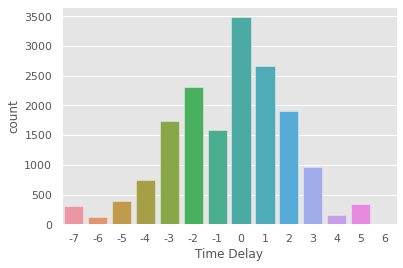

In [ ]:
plt.style.use('ggplot')
sns.countplot(x = Requested_DF["Time Delay"].dt.days)

In [13]:
New_DF['req_hour'] = ""

In [14]:
index = 0
for i in New_DF['req_time']:
  if pd.isnull(i) == False:
    New_DF.iloc[index,13] = i.strftime('%H')
  if pd.isnull(i) == True:
    New_DF.iloc[index,13] = np.nan
  index = index + 1

In [15]:
New_DF.dtypes
New_DF['req_hour'] = pd.to_numeric(New_DF['req_hour'], errors='coerce')

In [ ]:
New_DF.dtypes

In [16]:
break_point = [0,5,8,11,16,19,22,24]
time_slots =['Early Morning','Morning Rush','Morning','Daytime','Evening Crowd','night','LateNight']
New_DF['Request_BINS'] = pd.cut(New_DF['req_hour'], bins = break_point, labels = time_slots)

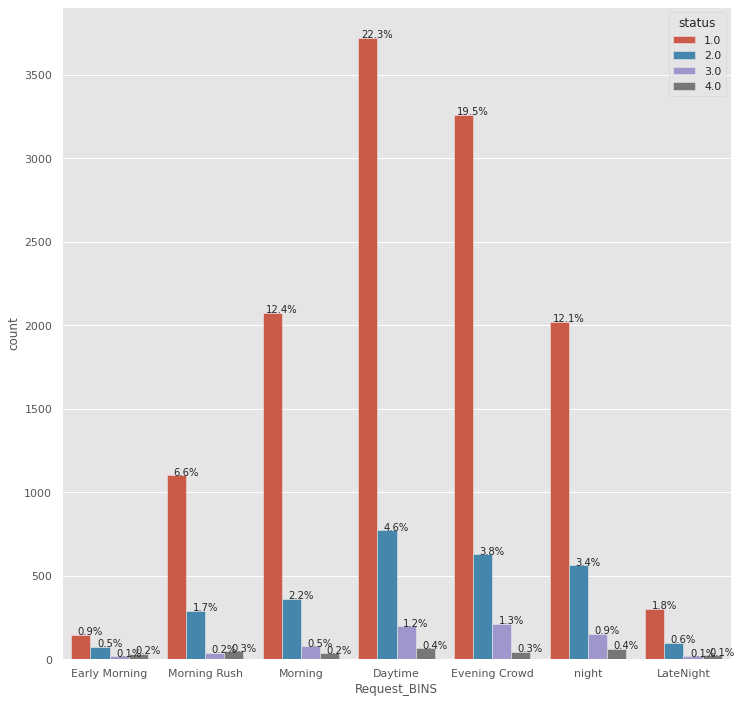

In [33]:
plt.rcParams['figure.figsize'] = [12,12]
f = New_DF[pd.isnull(New_DF['req_hour']) == False]
ax = sns.countplot(x = f['Request_BINS'],data = f,hue = f['status'])
total = float(len(f))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
x = df.iloc[0,8] - df.iloc[0,0]

In [ ]:
x.days

In [21]:
New_DF["Hour of price check"] = New_DF['price_check_time'].dt.hour

In [ ]:
New_DF.dtypes
New_DF.corr()

In [42]:
New_DF['status of request from user'] = ""
index = 0
for i in New_DF['req_time']:
  if pd.isnull(i) == False:
    New_DF.iloc[index,16] = 1
  elif pd.isnull(i) == True:
    New_DF.iloc[index,16] = 0
  index = index + 1

In [116]:
New_DF['Dayname of Request'] = ""
New_DF['Dayname of pricecheck'] = ""

In [122]:
index = 0
for i in New_DF['req_time']:
  if pd.isnull(i) == False:
    New_DF.iloc[index,18] = i.day_name()
  else:
    New_DF.iloc[index,18] = np.nan
  index = index + 1

In [126]:
index = 0
for i in New_DF['price_check_time']:
  New_DF.iloc[index,19] = i.day_name()
  index = index + 1

In [151]:
New_DF.iloc[0,8].month_name()

'January'

In [127]:
New_DF

,price_check_time,passenger,origin,destination,price,subsidy,distance,expected_duration,req_time,driver,status,FinalPrice,DOW_PRICE_CHECK,req_hour,Request_BINS,Hour of price check,status of request from user,status of drive from driver,Dayname of Request,Dayname of pricecheck
656,2021-01-03 23:53:40,0,0,0,55000,10000,4155.00,8.00,2021-01-06 16:09:01,2.0,1.0,45000,Sunday,16.00,Daytime,23,1,1,Wednesday,Sunday
0,2021-01-04 00:00:22,0,0,0,70000,0,4174.00,8.00,NaT,nan,nan,70000,Monday,NaN,NaN,0,0,NaN,NaN,Monday
1422,2021-01-05 01:44:42,0,1,0,50000,0,1857.00,3.00,NaT,nan,nan,50000,Tuesday,NaN,NaN,1,0,NaN,NaN,Tuesday
3241,2021-01-06 02:02:48,0,1,0,50000,0,713.00,2.00,2021-01-04 21:29:44,1.0,1.0,50000,Wednesday,21.00,night,2,1,1,Monday,Wednesday
1423,2021-01-06 02:12:30,0,1,0,50000,0,713.00,2.00,NaT,nan,nan,50000,Wednesday,NaN,NaN,2,0,NaN,NaN,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17835,2021-01-07 06:54:43,999,0,2,85000,0,8088.00,9.00,NaT,nan,nan,85000,Thursday,NaN,NaN,6,0,NaN,NaN,Thursday
20368,2021-01-07 23:02:53,999,2,2,115000,0,9333.00,12.00,2021-01-02 19:51:54,nan,2.0,115000,Thursday,19.00,Evening Crowd,23,1,1,Saturday,Thursday
20366,2021-01-07 23:03:59,999,2,2,115000,0,9304.00,12.00,NaT,nan,nan,115000,Thursday,NaN,NaN,23,0,NaN,NaN,Thursday
20907,2021-01-07 23:05:47,999,2,2,120000,0,9451.00,12.00,2021-01-02 20:08:18,297.0,1.0,120000,Thursday,20.00,night,23,1,1,Saturday,Thursday


In [43]:
New_DF['status of drive from driver'] = ""
index = 0
for i in New_DF['status']:
  if i == "1.0":
    New_DF.iloc[index,17] = 1
  elif i == "2.0":
    New_DF.iloc[index,17] = 1
  elif i == "3.0":
    New_DF.iloc[index,17] = 0
  else:
    New_DF.iloc[index,17] = np.nan
  index = index + 1

In [150]:
New_DF['Monthname of Request'] = ""
New_DF['Monthname of pricecheck'] = ""

In [153]:
index = 0
for i in New_DF['req_time']:
  if pd.isnull(i) == False:
    New_DF.iloc[index,20] = i.month_name()
  else:
    New_DF.iloc[index,20] = np.nan
  index = index + 1

In [154]:
index = 0
for i in New_DF['price_check_time']:
  New_DF.iloc[index,21] = i.month_name()
  index = index + 1

In [155]:
New_DF

,price_check_time,passenger,origin,destination,price,subsidy,distance,expected_duration,req_time,driver,...,DOW_PRICE_CHECK,req_hour,Request_BINS,Hour of price check,status of request from user,status of drive from driver,Dayname of Request,Dayname of pricecheck,Monthname of Request,Monthname of pricecheck
656,2021-01-03 23:53:40,0,0,0,55000,10000,4155.00,8.00,2021-01-06 16:09:01,2.0,...,Sunday,16.00,Daytime,23,1,1,Wednesday,Sunday,January,January
0,2021-01-04 00:00:22,0,0,0,70000,0,4174.00,8.00,NaT,nan,...,Monday,NaN,NaN,0,0,NaN,NaN,Monday,NaN,January
1422,2021-01-05 01:44:42,0,1,0,50000,0,1857.00,3.00,NaT,nan,...,Tuesday,NaN,NaN,1,0,NaN,NaN,Tuesday,NaN,January
3241,2021-01-06 02:02:48,0,1,0,50000,0,713.00,2.00,2021-01-04 21:29:44,1.0,...,Wednesday,21.00,night,2,1,1,Monday,Wednesday,January,January
1423,2021-01-06 02:12:30,0,1,0,50000,0,713.00,2.00,NaT,nan,...,Wednesday,NaN,NaN,2,0,NaN,NaN,Wednesday,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17835,2021-01-07 06:54:43,999,0,2,85000,0,8088.00,9.00,NaT,nan,...,Thursday,NaN,NaN,6,0,NaN,NaN,Thursday,NaN,January
20368,2021-01-07 23:02:53,999,2,2,115000,0,9333.00,12.00,2021-01-02 19:51:54,nan,...,Thursday,19.00,Evening Crowd,23,1,1,Saturday,Thursday,January,January
20366,2021-01-07 23:03:59,999,2,2,115000,0,9304.00,12.00,NaT,nan,...,Thursday,NaN,NaN,23,0,NaN,NaN,Thursday,NaN,January
20907,2021-01-07 23:05:47,999,2,2,120000,0,9451.00,12.00,2021-01-02 20:08:18,297.0,...,Thursday,20.00,night,23,1,1,Saturday,Thursday,January,January


In [159]:
New_DF["Monthname of Request"].unique()
New_DF["Monthname of pricecheck"].unique()

array(['January', 'December'], dtype=object)

#Customers And Drivers Behavior

In [50]:
Bashgah_Moshtarian = pd.DataFrame()
Club_Ranandegan = pd.DataFrame()

In [52]:
moshtarian = list(New_DF['passenger'].unique())

In [55]:
Bashgah_Moshtarian['id'] = moshtarian

In [59]:
ranandegan = list(New_DF['driver'].unique())
ranandegan.remove('nan')

In [60]:
Club_Ranandegan['id'] = ranandegan

In [180]:
Bashgah_Moshtarian["count of requests"] = ""
Bashgah_Moshtarian["count of cancelation"] = ""
Bashgah_Moshtarian["total spent"] = ""
Bashgah_Moshtarian["total subsidy"] = ""

In [181]:
New_DF

,price_check_time,passenger,origin,destination,price,subsidy,distance,expected_duration,req_time,driver,...,DOW_PRICE_CHECK,req_hour,Request_BINS,Hour of price check,status of request from user,status of drive from driver,Dayname of Request,Dayname of pricecheck,Monthname of Request,Monthname of pricecheck
656,2021-01-03 23:53:40,0,0,0,55000,10000,4155.00,8.00,2021-01-06 16:09:01,2.0,...,Sunday,16.00,Daytime,23,1,1,Wednesday,Sunday,January,January
0,2021-01-04 00:00:22,0,0,0,70000,0,4174.00,8.00,NaT,nan,...,Monday,NaN,NaN,0,0,NaN,NaN,Monday,NaN,January
1422,2021-01-05 01:44:42,0,1,0,50000,0,1857.00,3.00,NaT,nan,...,Tuesday,NaN,NaN,1,0,NaN,NaN,Tuesday,NaN,January
3241,2021-01-06 02:02:48,0,1,0,50000,0,713.00,2.00,2021-01-04 21:29:44,1.0,...,Wednesday,21.00,night,2,1,1,Monday,Wednesday,January,January
1423,2021-01-06 02:12:30,0,1,0,50000,0,713.00,2.00,NaT,nan,...,Wednesday,NaN,NaN,2,0,NaN,NaN,Wednesday,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17835,2021-01-07 06:54:43,999,0,2,85000,0,8088.00,9.00,NaT,nan,...,Thursday,NaN,NaN,6,0,NaN,NaN,Thursday,NaN,January
20368,2021-01-07 23:02:53,999,2,2,115000,0,9333.00,12.00,2021-01-02 19:51:54,nan,...,Thursday,19.00,Evening Crowd,23,1,1,Saturday,Thursday,January,January
20366,2021-01-07 23:03:59,999,2,2,115000,0,9304.00,12.00,NaT,nan,...,Thursday,NaN,NaN,23,0,NaN,NaN,Thursday,NaN,January
20907,2021-01-07 23:05:47,999,2,2,120000,0,9451.00,12.00,2021-01-02 20:08:18,297.0,...,Thursday,20.00,night,23,1,1,Saturday,Thursday,January,January


In [193]:
moshtarireqcount = {}
for i in moshtarian:
  x = df.loc[(df['passenger'] == i) & (pd.isnull(df['req_time']) == False)]
  g = x.shape[0]
  moshtarireqcount[i] = g

In [199]:
df.dtypes

price_check_time     datetime64[ns]
passenger                    object
origin                       object
destination                  object
price                         int64
subsidy                       int64
distance                    float64
expected_duration           float64
req_time             datetime64[ns]
driver                       object
status                       object
dtype: object

In [200]:
moshtaricancelc = {}
for i in moshtarian:
  x = df.loc[(df['passenger'] == i) & (df['status'] == "2.0")]
  g = x.shape[0]
  moshtaricancelc[i] = g

In [203]:
moshtariantotalspent = {}
for i in moshtarian:
  spent = []
  x = df.loc[(df['passenger'] == i) & (df['status'] == "1.0")]
  for j in x['price']:
    spent.append(j)
  g = sum(spent)
  moshtariantotalspent[i] = g

In [211]:
moshtariansubsidy = {}
for i in moshtarian:
  spent = []
  x = df.loc[(df['passenger'] == i) & (df['status'] == "1.0")]
  for j in x['subsidy']:
    spent.append(j)
  g = sum(spent)
  moshtariansubsidy[i] = g

In [217]:
Bashgah_Moshtarian

,id,count of requests,count of cancelation,total spent,total subsidy
0,0,2,0,105000,10000
1,1,8,2,310000,50000
2,10,3,0,140000,20000
3,100,3,1,115000,20000
4,1000,1,0,50000,0
...,...,...,...,...,...
6779,995,8,1,375000,65000
6780,996,2,0,115000,30000
6781,997,13,5,515000,75000
6782,998,6,3,245000,40000


In [291]:
index = 0
for i in Bashgah_Moshtarian['id']:
  Bashgah_Moshtarian.iloc[index,1] = moshtarireqcount[i]
  Bashgah_Moshtarian.iloc[index,2] = moshtaricancelc[i]
  Bashgah_Moshtarian.iloc[index,3] = moshtariantotalspent[i]
  Bashgah_Moshtarian.iloc[index,4] = moshtariansubsidy[i]
  index = index + 1

In [266]:
Bashgah_Moshtarian["points"] = ""

In [269]:
Bashgah_Moshtarian['count of cancelation'] = Bashgah_Moshtarian['count of cancelation'].astype(int)
Bashgah_Moshtarian['count of requests'] = Bashgah_Moshtarian['count of requests'].astype(int)

In [272]:
index = 0
for i,j,k in zip(Bashgah_Moshtarian["count of requests"],Bashgah_Moshtarian["count of cancelation"],Bashgah_Moshtarian["total spent"]):
  point = (i - j/2) * (k/1000)
  Bashgah_Moshtarian.iloc[index,5] = point
  index = index + 1

In [273]:
Bashgah_Moshtarian

,id,count of requests,count of cancelation,total spent,total subsidy,points
0,0,2,0,105000,10000,210.00
1,1,8,2,310000,50000,2170.00
2,10,3,0,140000,20000,420.00
3,100,3,1,115000,20000,287.50
4,1000,1,0,50000,0,50.00
...,...,...,...,...,...,...
6779,995,8,1,375000,65000,2812.50
6780,996,2,0,115000,30000,230.00
6781,997,13,5,515000,75000,5407.50
6782,998,6,3,245000,40000,1102.50


Now Drivers Club

In [274]:
Club_Ranandegan["count of Compelete Trips"] = ""
Club_Ranandegan["count of cancelation"] = ""
Club_Ranandegan["total earning"] = ""
Club_Ranandegan["points"] = ""

In [275]:
New_DF

,price_check_time,passenger,origin,destination,price,subsidy,distance,expected_duration,req_time,driver,...,DOW_PRICE_CHECK,req_hour,Request_BINS,Hour of price check,status of request from user,status of drive from driver,Dayname of Request,Dayname of pricecheck,Monthname of Request,Monthname of pricecheck
656,2021-01-03 23:53:40,0,0,0,55000,10000,4155.00,8.00,2021-01-06 16:09:01,2.0,...,Sunday,16.00,Daytime,23,1,1,Wednesday,Sunday,January,January
0,2021-01-04 00:00:22,0,0,0,70000,0,4174.00,8.00,NaT,nan,...,Monday,NaN,NaN,0,0,NaN,NaN,Monday,NaN,January
1422,2021-01-05 01:44:42,0,1,0,50000,0,1857.00,3.00,NaT,nan,...,Tuesday,NaN,NaN,1,0,NaN,NaN,Tuesday,NaN,January
3241,2021-01-06 02:02:48,0,1,0,50000,0,713.00,2.00,2021-01-04 21:29:44,1.0,...,Wednesday,21.00,night,2,1,1,Monday,Wednesday,January,January
1423,2021-01-06 02:12:30,0,1,0,50000,0,713.00,2.00,NaT,nan,...,Wednesday,NaN,NaN,2,0,NaN,NaN,Wednesday,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17835,2021-01-07 06:54:43,999,0,2,85000,0,8088.00,9.00,NaT,nan,...,Thursday,NaN,NaN,6,0,NaN,NaN,Thursday,NaN,January
20368,2021-01-07 23:02:53,999,2,2,115000,0,9333.00,12.00,2021-01-02 19:51:54,nan,...,Thursday,19.00,Evening Crowd,23,1,1,Saturday,Thursday,January,January
20366,2021-01-07 23:03:59,999,2,2,115000,0,9304.00,12.00,NaT,nan,...,Thursday,NaN,NaN,23,0,NaN,NaN,Thursday,NaN,January
20907,2021-01-07 23:05:47,999,2,2,120000,0,9451.00,12.00,2021-01-02 20:08:18,297.0,...,Thursday,20.00,night,23,1,1,Saturday,Thursday,January,January


In [281]:
drivercompletetrip = {}
for i in Club_Ranandegan['id']:
  x = New_DF.loc[(New_DF['driver'] == i) & (New_DF['status'] == "1.0")]
  g = x.shape[0]
  drivercompletetrip[i] = g

In [282]:
drvcancl = {}
for i in Club_Ranandegan['id']:
  x = New_DF.loc[(New_DF['driver'] == i) & (New_DF['status'] == "3.0")]
  g = x.shape[0]
  drvcancl[i] = g

In [284]:
totalearn = {}
for i in Club_Ranandegan['id']:
  earn = []
  x = df.loc[(df['driver'] == i) & (df['status'] == "1.0")]
  for j in x['price']:
    earn.append(j)
  g = sum(earn)
  totalearn[i] = g

In [287]:
index = 0
for i in Club_Ranandegan['id']:
  Club_Ranandegan.iloc[index,1] = drivercompletetrip[i]
  Club_Ranandegan.iloc[index,2] = drvcancl[i]
  Club_Ranandegan.iloc[index,3] = totalearn[i]
  index = index + 1

In [288]:
Club_Ranandegan

,id,count of Compelete Trips,count of cancelation,total earning,points
0,2.0,54,1,3330000,
1,1.0,11,0,625000,
2,4.0,3,1,155000,
3,5.0,3,0,160000,
4,6.0,6,0,410000,
...,...,...,...,...,...
1747,1257.0,0,1,0,
1748,1258.0,1,0,65000,
1749,1265.0,0,1,0,
1750,1267.0,1,0,60000,


In [292]:
index = 0
for i,j,k in zip(Club_Ranandegan["count of Compelete Trips"],Club_Ranandegan["count of cancelation"],Club_Ranandegan["total earning"]):
  point = (i - (j*2)) * (k/1000)
  Club_Ranandegan.iloc[index,4] = point
  index = index + 1

In [293]:
Club_Ranandegan

,id,count of Compelete Trips,count of cancelation,total earning,points
0,2.0,54,1,3330000,173160.00
1,1.0,11,0,625000,6875.00
2,4.0,3,1,155000,155.00
3,5.0,3,0,160000,480.00
4,6.0,6,0,410000,2460.00
...,...,...,...,...,...
1747,1257.0,0,1,0,-0.00
1748,1258.0,1,0,65000,65.00
1749,1265.0,0,1,0,-0.00
1750,1267.0,1,0,60000,60.00


#Analyzing DATA

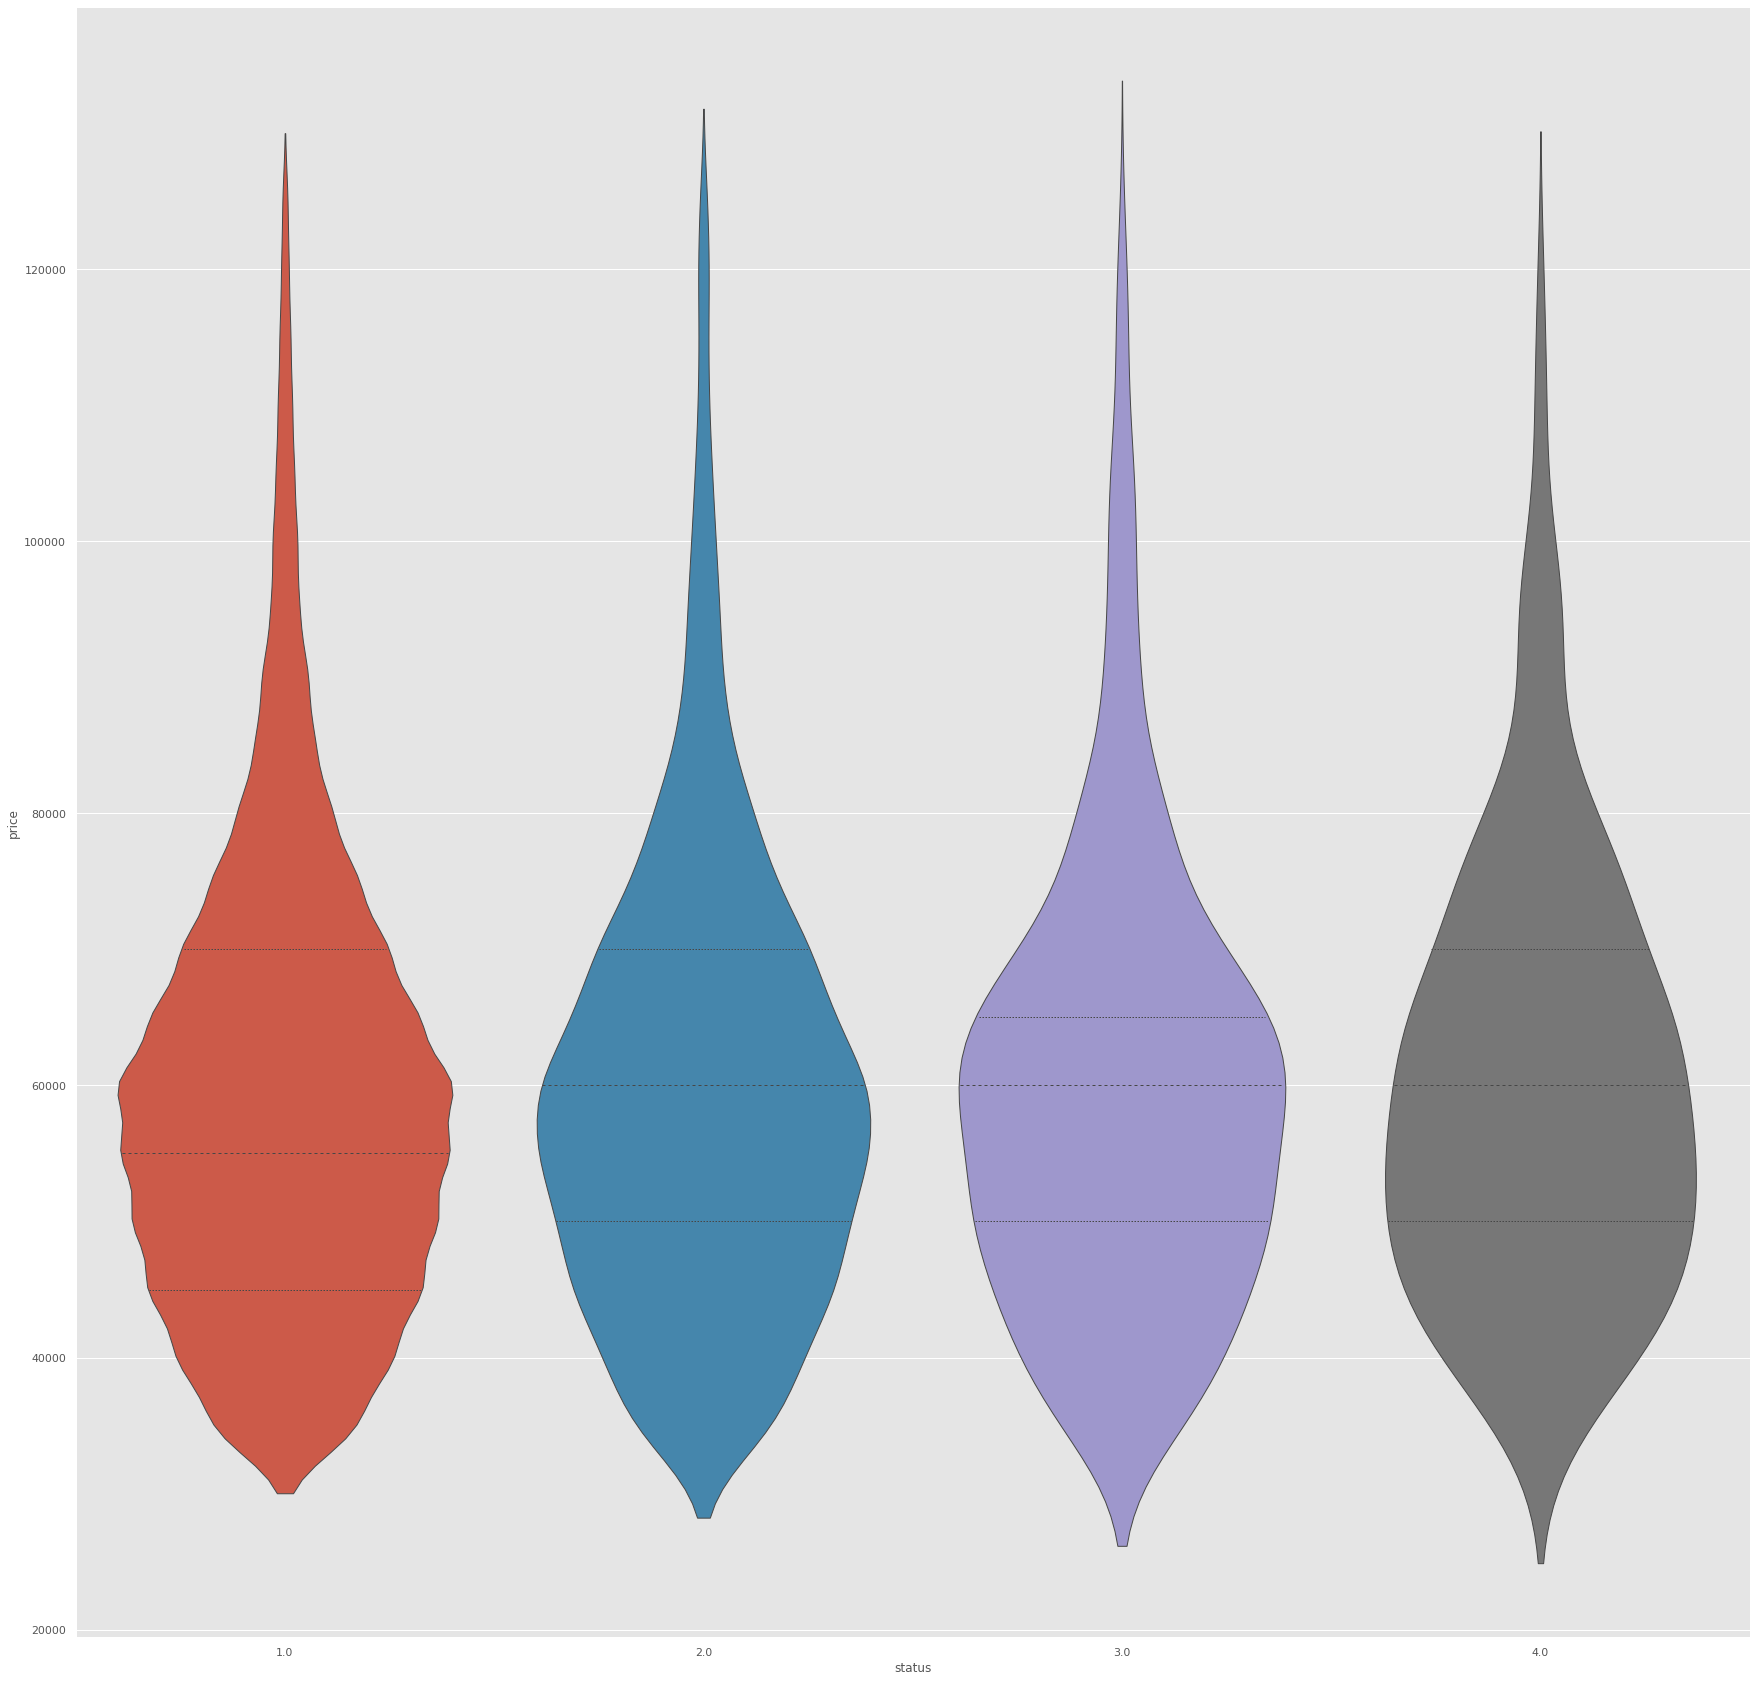

In [65]:
x = New_DF.loc[(pd.isnull(New_DF['req_hour']) == False) & (New_DF['price'] < 130000)]
sns.violinplot(data = x,
               x="status", y="price",
               split=True, inner="quart", linewidth=1)

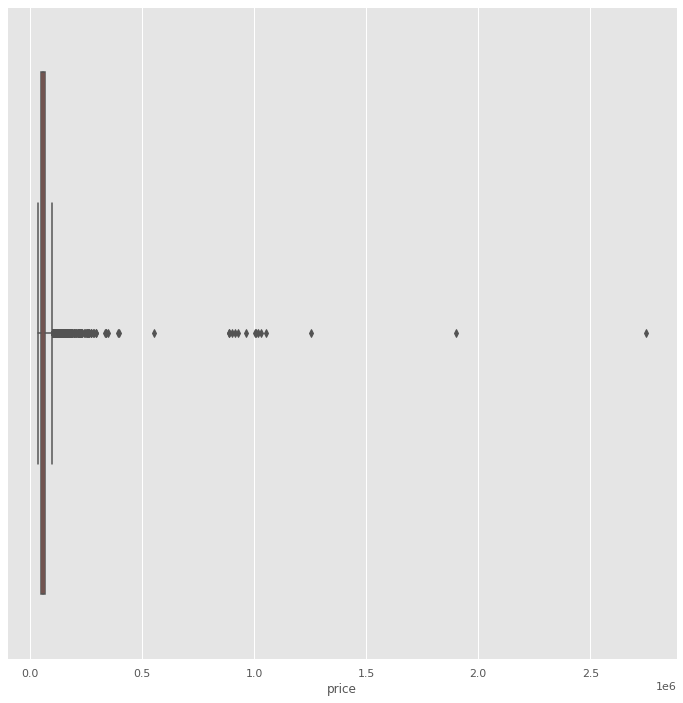

In [ ]:
sns.boxplot(data = New_DF,x = "price")

we have some outliers

In [70]:
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(New_DF, 'price')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -10000.0
Upper end outer fence:  130000.0


In [ ]:
New_DF[New_DF['price']>130000]

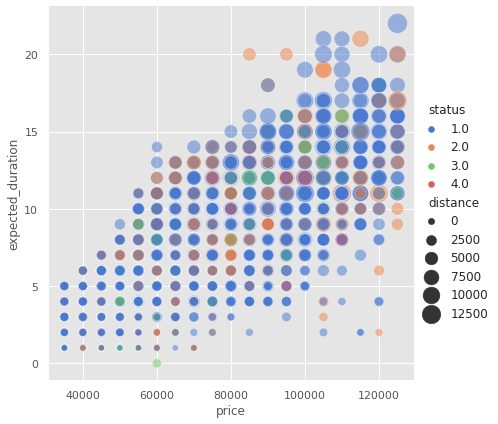

In [140]:
x = New_DF.loc[(pd.isnull(New_DF['req_hour']) == False) & (New_DF['price'] < 130000)]
plt.rcParams['figure.figsize'] = [30,30]
sns.relplot(data=x,x="price", y="expected_duration", hue="status",size ="distance", sizes=(40, 400), alpha=.5, palette="muted",
            height=6)

In [ ]:
max(New_DF['price'])
New_DF[New_DF['price'] == 1900000]

,price_check_time,passenger,origin,destination,price,subsidy,distance,expected_duration,req_time,driver,status,FinalPrice,DOW_PRICE_CHECK,req_hour,Request_BINS,Hour of price check,Hour of reqtime
21362,2021-01-02 08:46:53,683,2,3,1900000,305000,377560.00,246.00,2021-01-03 16:35:05,285.00,1.00,1595000,Saturday,16.00,Daytime,8,16.00


In [78]:
New_DF

,price_check_time,passenger,origin,destination,price,subsidy,distance,expected_duration,req_time,driver,status,FinalPrice,DOW_PRICE_CHECK,req_hour,Request_BINS,Hour of price check,status of request from user,status of drive from driver
656,2021-01-03 23:53:40,0,0,0,55000,10000,4155.00,8.00,2021-01-06 16:09:01,2.0,1.0,45000,Sunday,16.00,Daytime,23,1,1
0,2021-01-04 00:00:22,0,0,0,70000,0,4174.00,8.00,NaT,nan,nan,70000,Monday,NaN,NaN,0,0,NaN
1422,2021-01-05 01:44:42,0,1,0,50000,0,1857.00,3.00,NaT,nan,nan,50000,Tuesday,NaN,NaN,1,0,NaN
3241,2021-01-06 02:02:48,0,1,0,50000,0,713.00,2.00,2021-01-04 21:29:44,1.0,1.0,50000,Wednesday,21.00,night,2,1,1
1423,2021-01-06 02:12:30,0,1,0,50000,0,713.00,2.00,NaT,nan,nan,50000,Wednesday,NaN,NaN,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17835,2021-01-07 06:54:43,999,0,2,85000,0,8088.00,9.00,NaT,nan,nan,85000,Thursday,NaN,NaN,6,0,NaN
20368,2021-01-07 23:02:53,999,2,2,115000,0,9333.00,12.00,2021-01-02 19:51:54,nan,2.0,115000,Thursday,19.00,Evening Crowd,23,1,1
20366,2021-01-07 23:03:59,999,2,2,115000,0,9304.00,12.00,NaT,nan,nan,115000,Thursday,NaN,NaN,23,0,NaN
20907,2021-01-07 23:05:47,999,2,2,120000,0,9451.00,12.00,2021-01-02 20:08:18,297.0,1.0,120000,Thursday,20.00,night,23,1,1


In [ ]:
New_DF.drop([21358],inplace = True)

In [ ]:
New_DF['origin'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
list_of_regions = list(New_DF['origin'].unique())

In [ ]:
pd.options.display.float_format='{:.2f}'.format
for i in list_of_regions:
  for j in list_of_regions:
    m = New_DF.loc[(New_DF['origin'] == i) & (New_DF['destination'] == j)]
    o = float("{:.2f}".format(m['distance'].mean()))
    if pd.isnull(o) == False:
      print("Mean of Region {} and {} is {}".format(i,j,o))

Mean of Region 0 and 0 is 3570.88
Mean of Region 0 and 1 is 4958.0
Mean of Region 0 and 2 is 3055.47
Mean of Region 1 and 0 is 1985.05
Mean of Region 1 and 1 is 3356.96
Mean of Region 1 and 2 is 4012.6
Mean of Region 1 and 3 is 184053.0
Mean of Region 2 and 0 is 3333.98
Mean of Region 2 and 1 is 2674.55
Mean of Region 2 and 2 is 5365.4
Mean of Region 2 and 3 is 232535.0
Mean of Region 3 and 3 is 2695.07
Mean of Region 3 and 4 is 4095.45
Mean of Region 4 and 3 is 4253.52
Mean of Region 4 and 4 is 1397.7


In [ ]:
for i in list_of_regions:
  for j in list_of_regions:
    m = New_DF.loc[(New_DF['origin'] == i) & (New_DF['destination'] == j)]
    o = float("{:.2f}".format(m['price'].mean()))
    if pd.isnull(o) == False:
      print("Mean of Region {} and {} is {}".format(i,j,o))

Mean of Region 0 and 0 is 67088.61
Mean of Region 0 and 1 is 75029.13
Mean of Region 0 and 2 is 60704.15
Mean of Region 1 and 0 is 54185.79
Mean of Region 1 and 1 is 63884.51
Mean of Region 1 and 2 is 67355.05
Mean of Region 1 and 3 is 1005000.0
Mean of Region 2 and 0 is 61848.76
Mean of Region 2 and 1 is 56148.95
Mean of Region 2 and 2 is 74160.4
Mean of Region 2 and 3 is 1203000.0
Mean of Region 3 and 3 is 56528.83
Mean of Region 3 and 4 is 64143.65
Mean of Region 4 and 3 is 71813.1
Mean of Region 4 and 4 is 51038.01


In [ ]:
for i in list_of_regions:
  for j in list_of_regions:
    m = New_DF.loc[(New_DF['origin'] == i) & (New_DF['destination'] == j)]
    o = float("{:.2f}".format(m['expected_duration'].mean()))
    if pd.isnull(o) == False:
      print("Mean of Region {} and {} is {}".format(i,j,o))

Mean of Region 0 and 0 is 6.91
Mean of Region 0 and 1 is 8.47
Mean of Region 0 and 2 is 5.04
Mean of Region 1 and 0 is 4.54
Mean of Region 1 and 1 is 6.43
Mean of Region 1 and 2 is 7.23
Mean of Region 1 and 3 is 125.0
Mean of Region 2 and 0 is 6.61
Mean of Region 2 and 1 is 4.83
Mean of Region 2 and 2 is 9.0
Mean of Region 2 and 3 is 149.0
Mean of Region 3 and 3 is 4.93
Mean of Region 3 and 4 is 7.46
Mean of Region 4 and 3 is 8.26
Mean of Region 4 and 4 is 3.38


In [ ]:
New_DF.dtypes

price_check_time       datetime64[ns]
passenger                       int64
origin                          int64
destination                     int64
price                           int64
subsidy                         int64
distance                      float64
expected_duration             float64
req_time               datetime64[ns]
driver                        float64
status                        float64
FinalPrice                      int64
DOW_PRICE_CHECK                object
req_hour                      float64
Request_BINS                 category
Hour of price check             int64
Hour of reqtime               float64
dtype: object

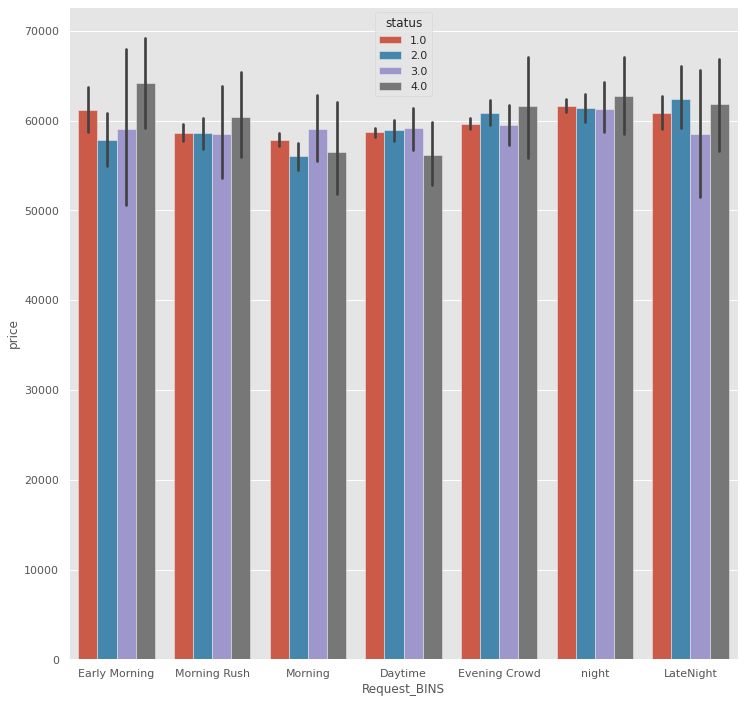

In [67]:
plt.rcParams['figure.figsize'] = [12,12]
sns.barplot(data = x , x = "Request_BINS" , y = "price" , hue = "status")

In [71]:
outer_fence_le, outer_fence_ue = fences(New_DF, 'distance')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -4776.0
Upper end outer fence:  10785.0


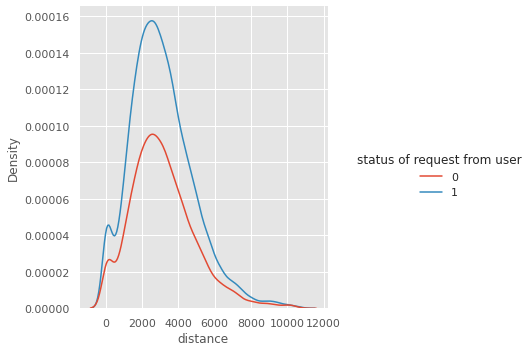

In [80]:
x = New_DF.loc[(New_DF["distance"] < 10785.0) & (New_DF["distance"] > 0)]
sns.displot(x, x="distance" , hue = "status of request from user" , kind="kde")

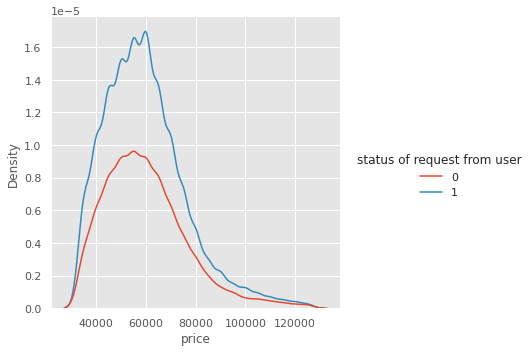

In [176]:
x = New_DF.loc[(New_DF["price"] < 130000) & (New_DF["distance"] > 0)]
sns.displot(x, x="price" , hue = "status of request from user" , kind="kde")

In [84]:
pd.isnull(New_DF["status of drive from driver"]).any()

True

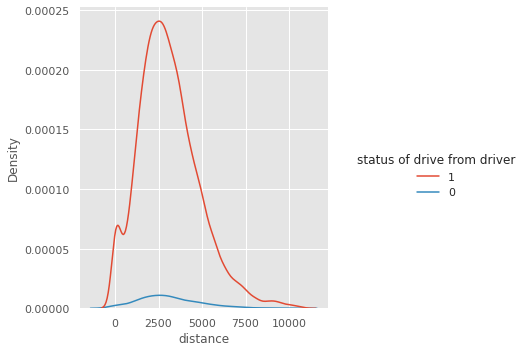

In [95]:
x = New_DF.loc[(New_DF["distance"] < 10785.0) & (New_DF["distance"] > 0)]
palette ={1: "C0", 0: "C1"}
sns.displot(x, x="distance" , hue = "status of drive from driver" , kind="kde" , palette = palette)

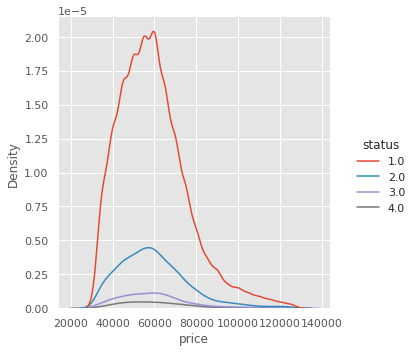

In [101]:
x = New_DF.loc[(New_DF["price"] < 130000) & (pd.isnull(New_DF['req_hour']) == False)]
sns.displot(x, x="price" , hue = "status" , kind="kde")

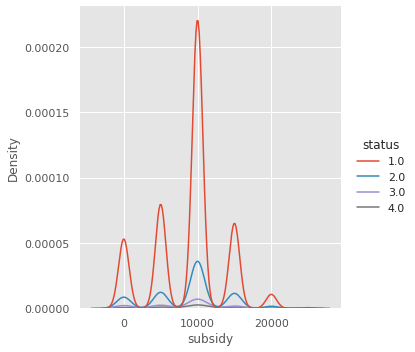

In [104]:
x = New_DF.loc[(New_DF["price"] < 130000) & (pd.isnull(New_DF['req_hour']) == False)]
sns.displot(x, x="subsidy" , hue = "status" , kind="kde")

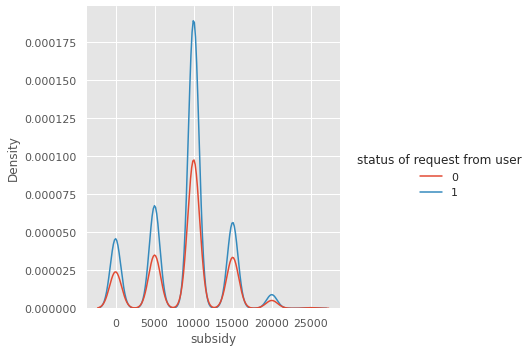

In [178]:
x = New_DF.loc[New_DF["price"] < 130000]
sns.displot(x, x="subsidy" , hue = "status of request from user" , kind="kde")

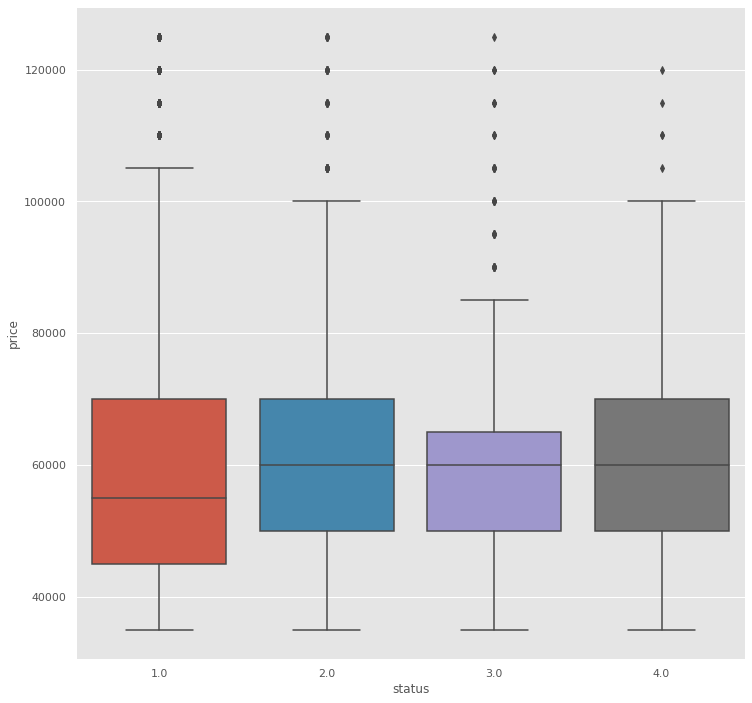

In [106]:
sns.boxplot(data = x , x = "status" , y = "price")

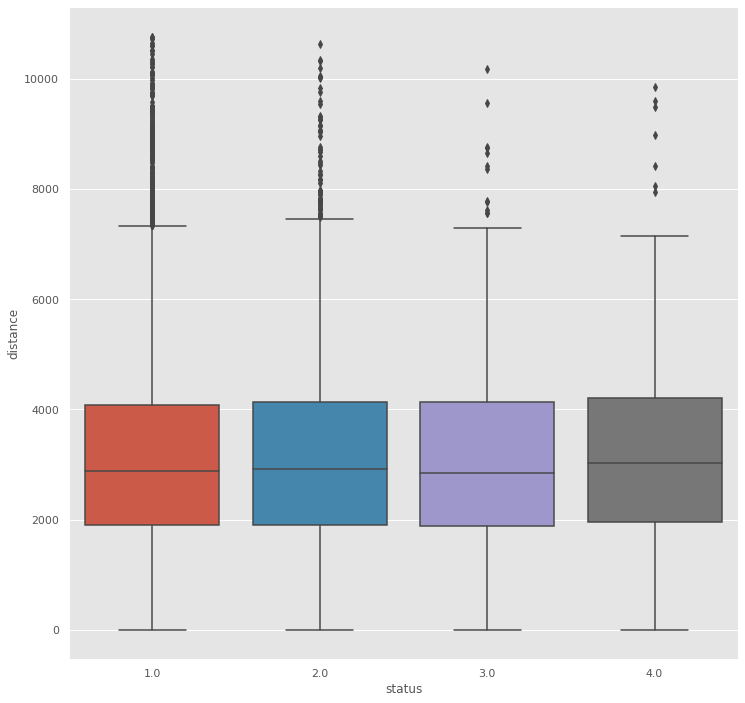

In [110]:
x = New_DF.loc[(New_DF["distance"] < 10785.0) & (New_DF["distance"] > 0) & (pd.isnull(New_DF['req_hour']) == False)]
sns.boxplot(data = x , x = "status" , y = "distance")

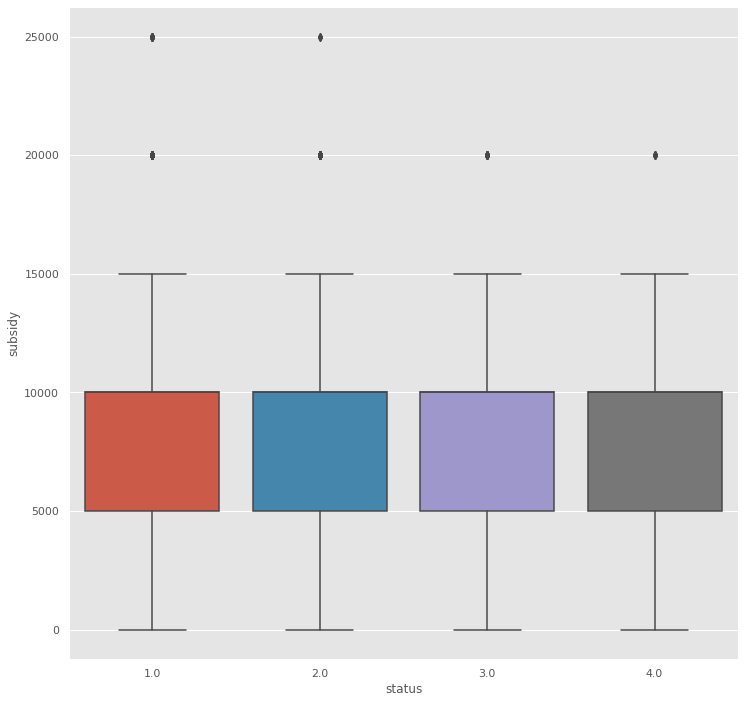

In [108]:
sns.boxplot(data = x , x = "status" , y = "subsidy")

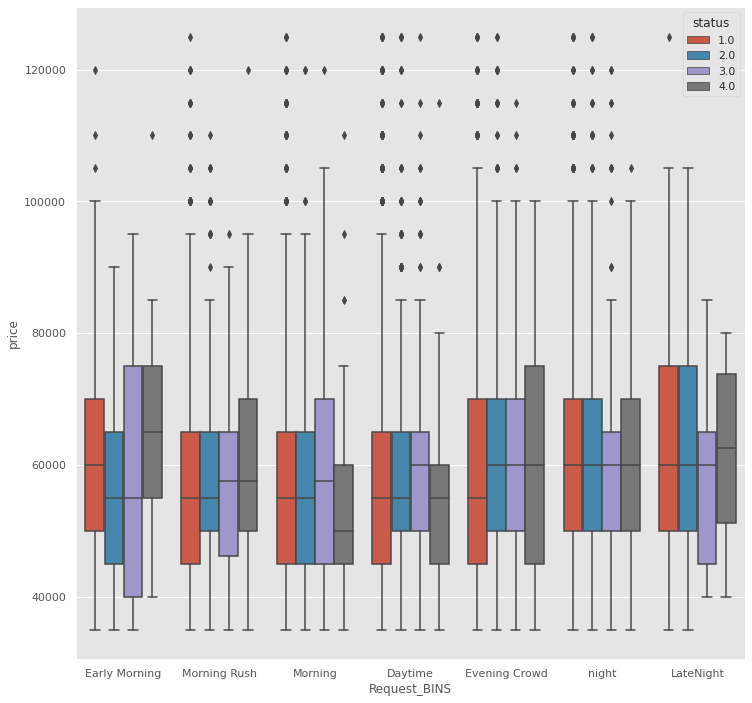

In [111]:
x = New_DF.loc[(New_DF["price"] < 130000) & (pd.isnull(New_DF['req_hour']) == False)]
sns.boxplot(data = x , x = "Request_BINS" , y = "price" , hue = "status")

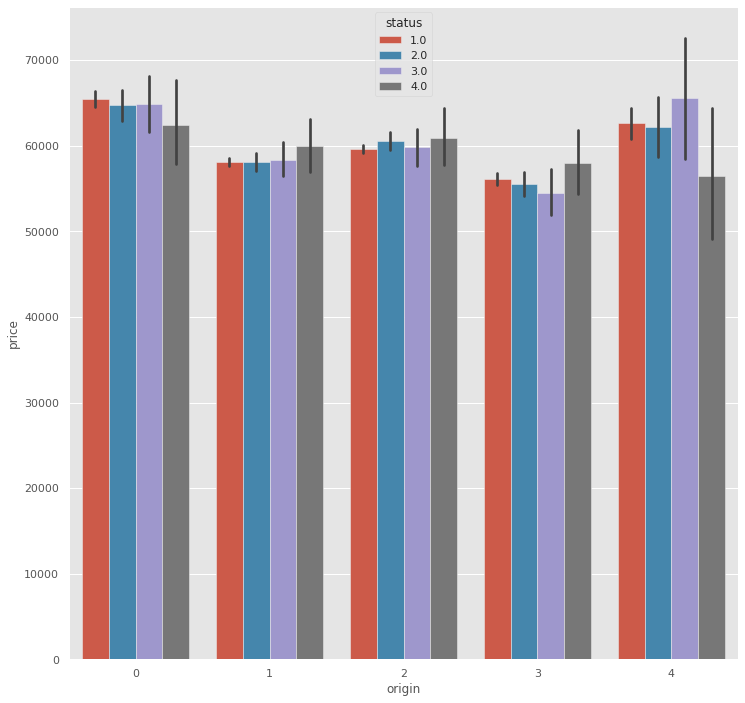

In [112]:
plt.rcParams['figure.figsize'] = [12,12]
sns.barplot(data = x , x = "origin" , y = "price" , hue = "status")

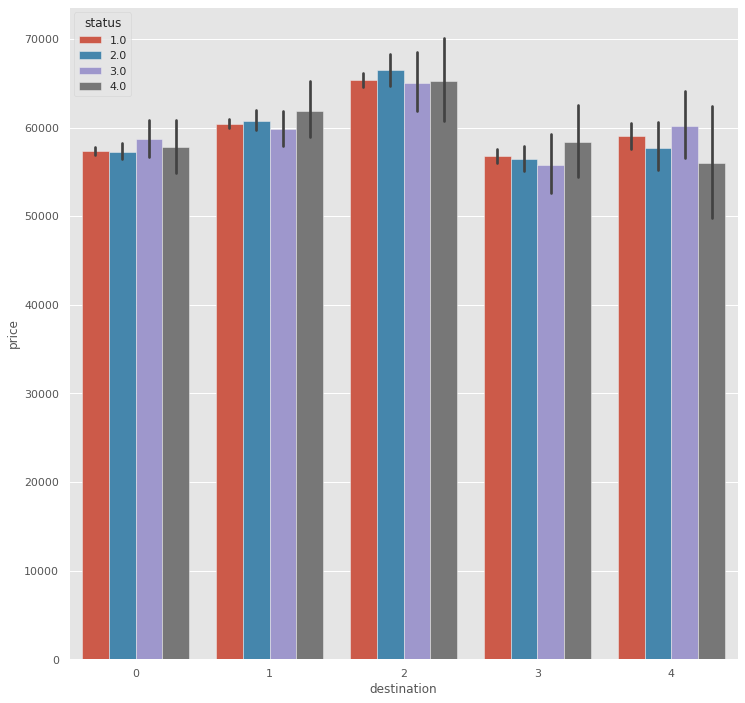

In [113]:
plt.rcParams['figure.figsize'] = [12,12]
sns.barplot(data = x , x = "destination" , y = "price" , hue = "status")

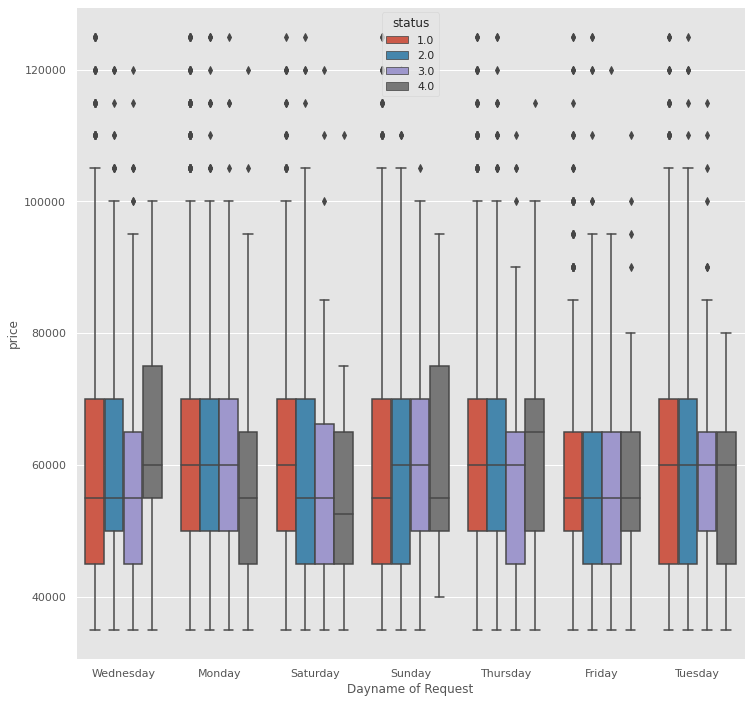

In [128]:
x = New_DF.loc[(New_DF["price"] < 130000) & (pd.isnull(New_DF['req_hour']) == False)]
sns.boxplot(data = x , x = "Dayname of Request" , y = "price" , hue = "status")

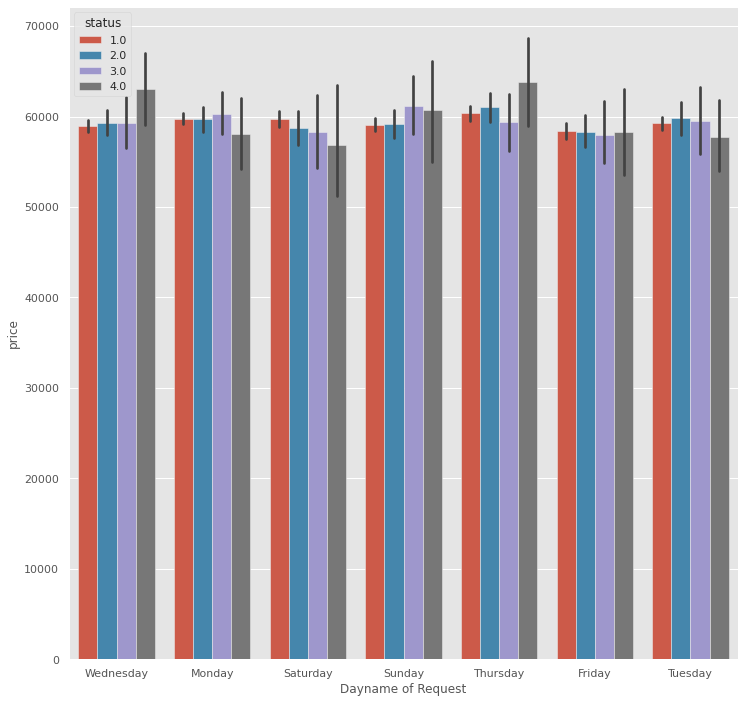

In [129]:
plt.rcParams['figure.figsize'] = [12,12]
sns.barplot(data = x , x = "Dayname of Request" , y = "price" , hue = "status")

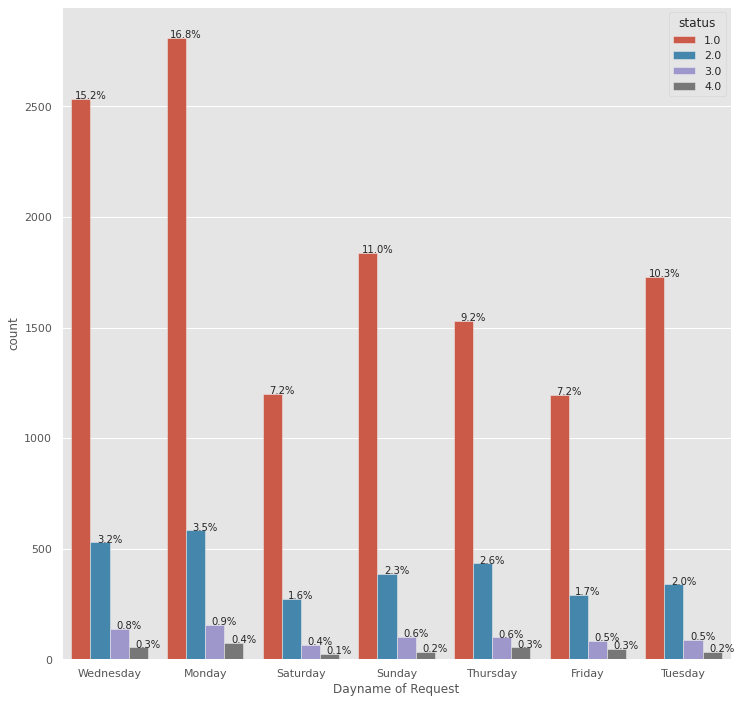

In [132]:
plt.rcParams['figure.figsize'] = [12,12]
f = New_DF[pd.isnull(New_DF['req_hour']) == False]
ax = sns.countplot(x = f['Dayname of Request'],data = f,hue = f['status'])
total = float(len(f))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

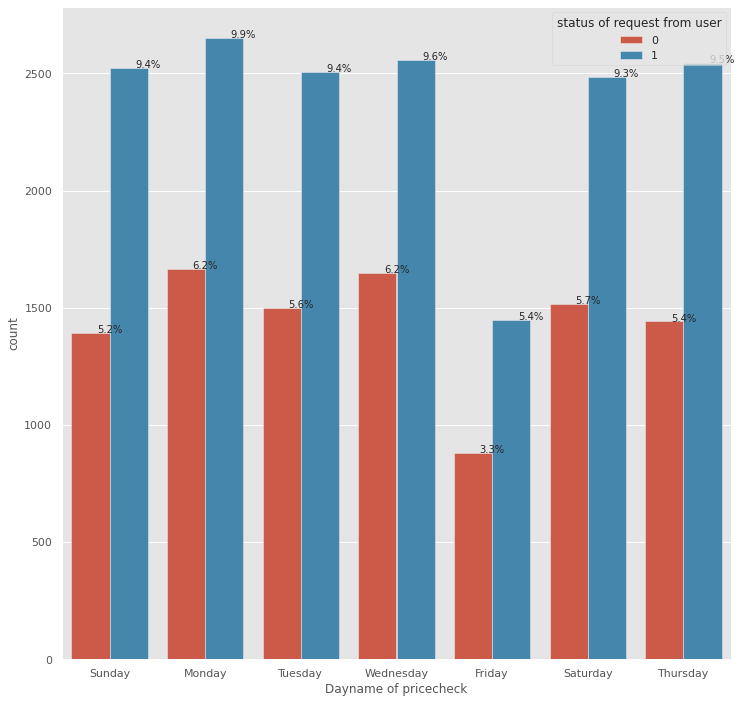

In [133]:
plt.rcParams['figure.figsize'] = [12,12]
f = New_DF
ax = sns.countplot(x = f['Dayname of pricecheck'],data = f,hue = f['status of request from user'])
total = float(len(f))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

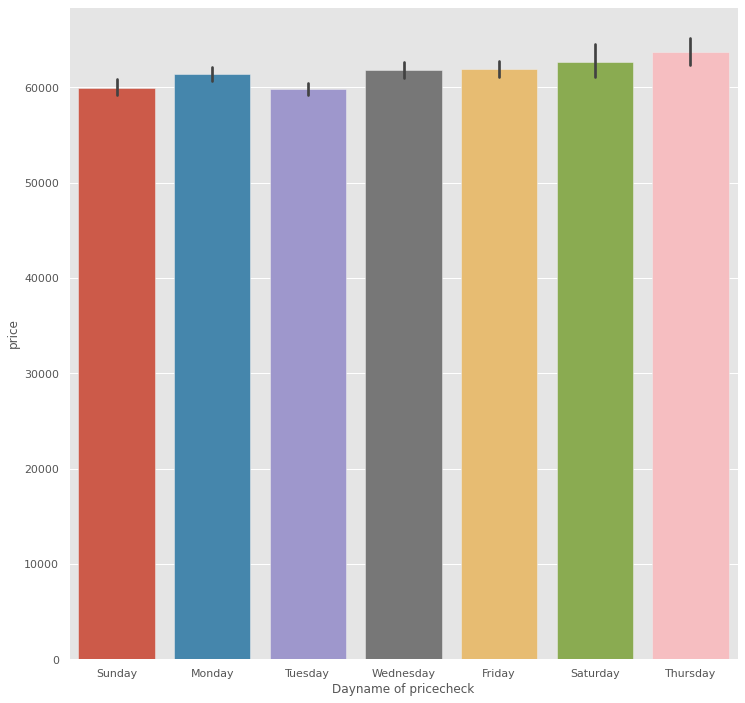

In [136]:
plt.rcParams['figure.figsize'] = [12,12]
f = New_DF
ax = sns.barplot(x = f['Dayname of pricecheck'],data = f, y = "price")

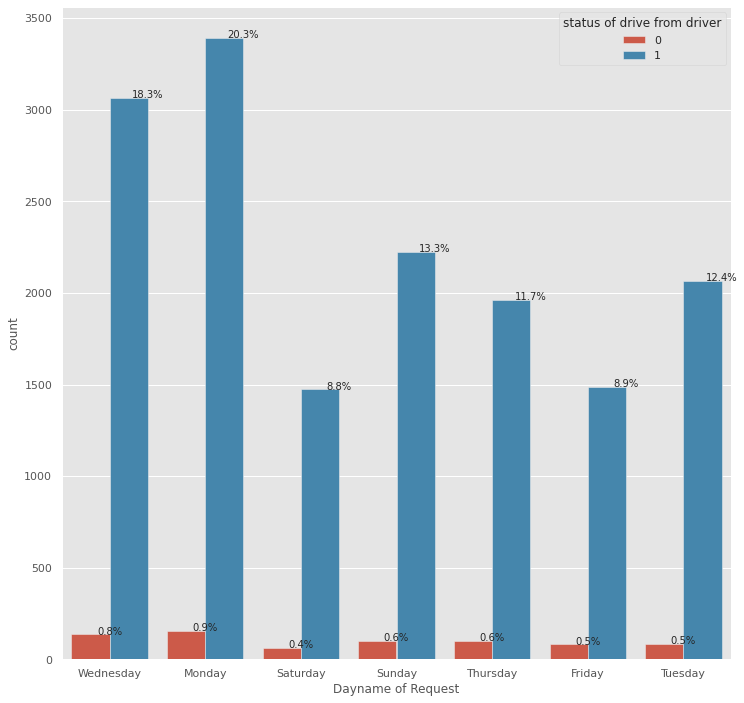

In [137]:
plt.rcParams['figure.figsize'] = [12,12]
f = New_DF[pd.isnull(New_DF['req_hour']) == False]
ax = sns.countplot(x = f['Dayname of Request'],data = f,hue = f['status of drive from driver'])
total = float(len(f))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

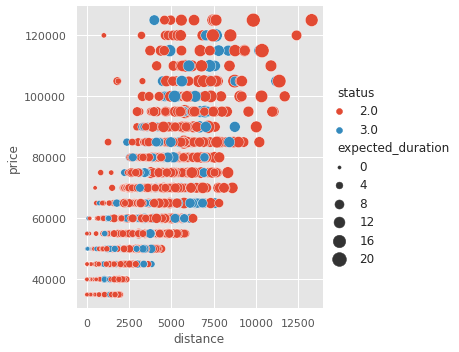

In [149]:
x = New_DF.loc[(pd.isnull(New_DF['req_hour']) == False) & (New_DF['price'] < 130000) & ((New_DF['status'] == "2.0") | (New_DF['status'] == "3.0"))]
g = sns.relplot(
    data=x,
    x="distance", y="price",
    hue="status", size="expected_duration", sizes=(10, 200),
)

In [243]:
Bashgah_Moshtarian

,id,count of requests,count of cancelation,total spent,total subsidy
0,0,2,0,105000,10000
1,1,8,2,310000,50000
2,10,3,0,140000,20000
3,100,3,1,115000,20000
4,1000,1,0,50000,0
...,...,...,...,...,...
6779,995,8,1,375000,65000
6780,996,2,0,115000,30000
6781,997,13,5,515000,75000
6782,998,6,3,245000,40000


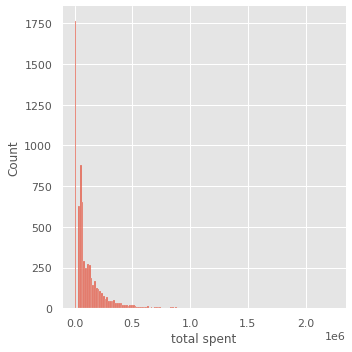

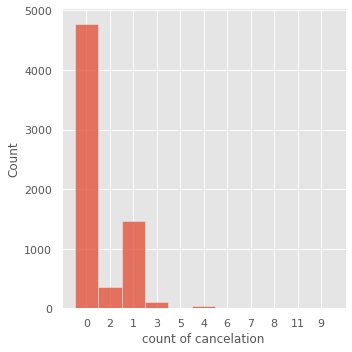

In [229]:
sns.displot(Bashgah_Moshtarian, x="total spent")
sns.displot(Bashgah_Moshtarian, x="count of cancelation")

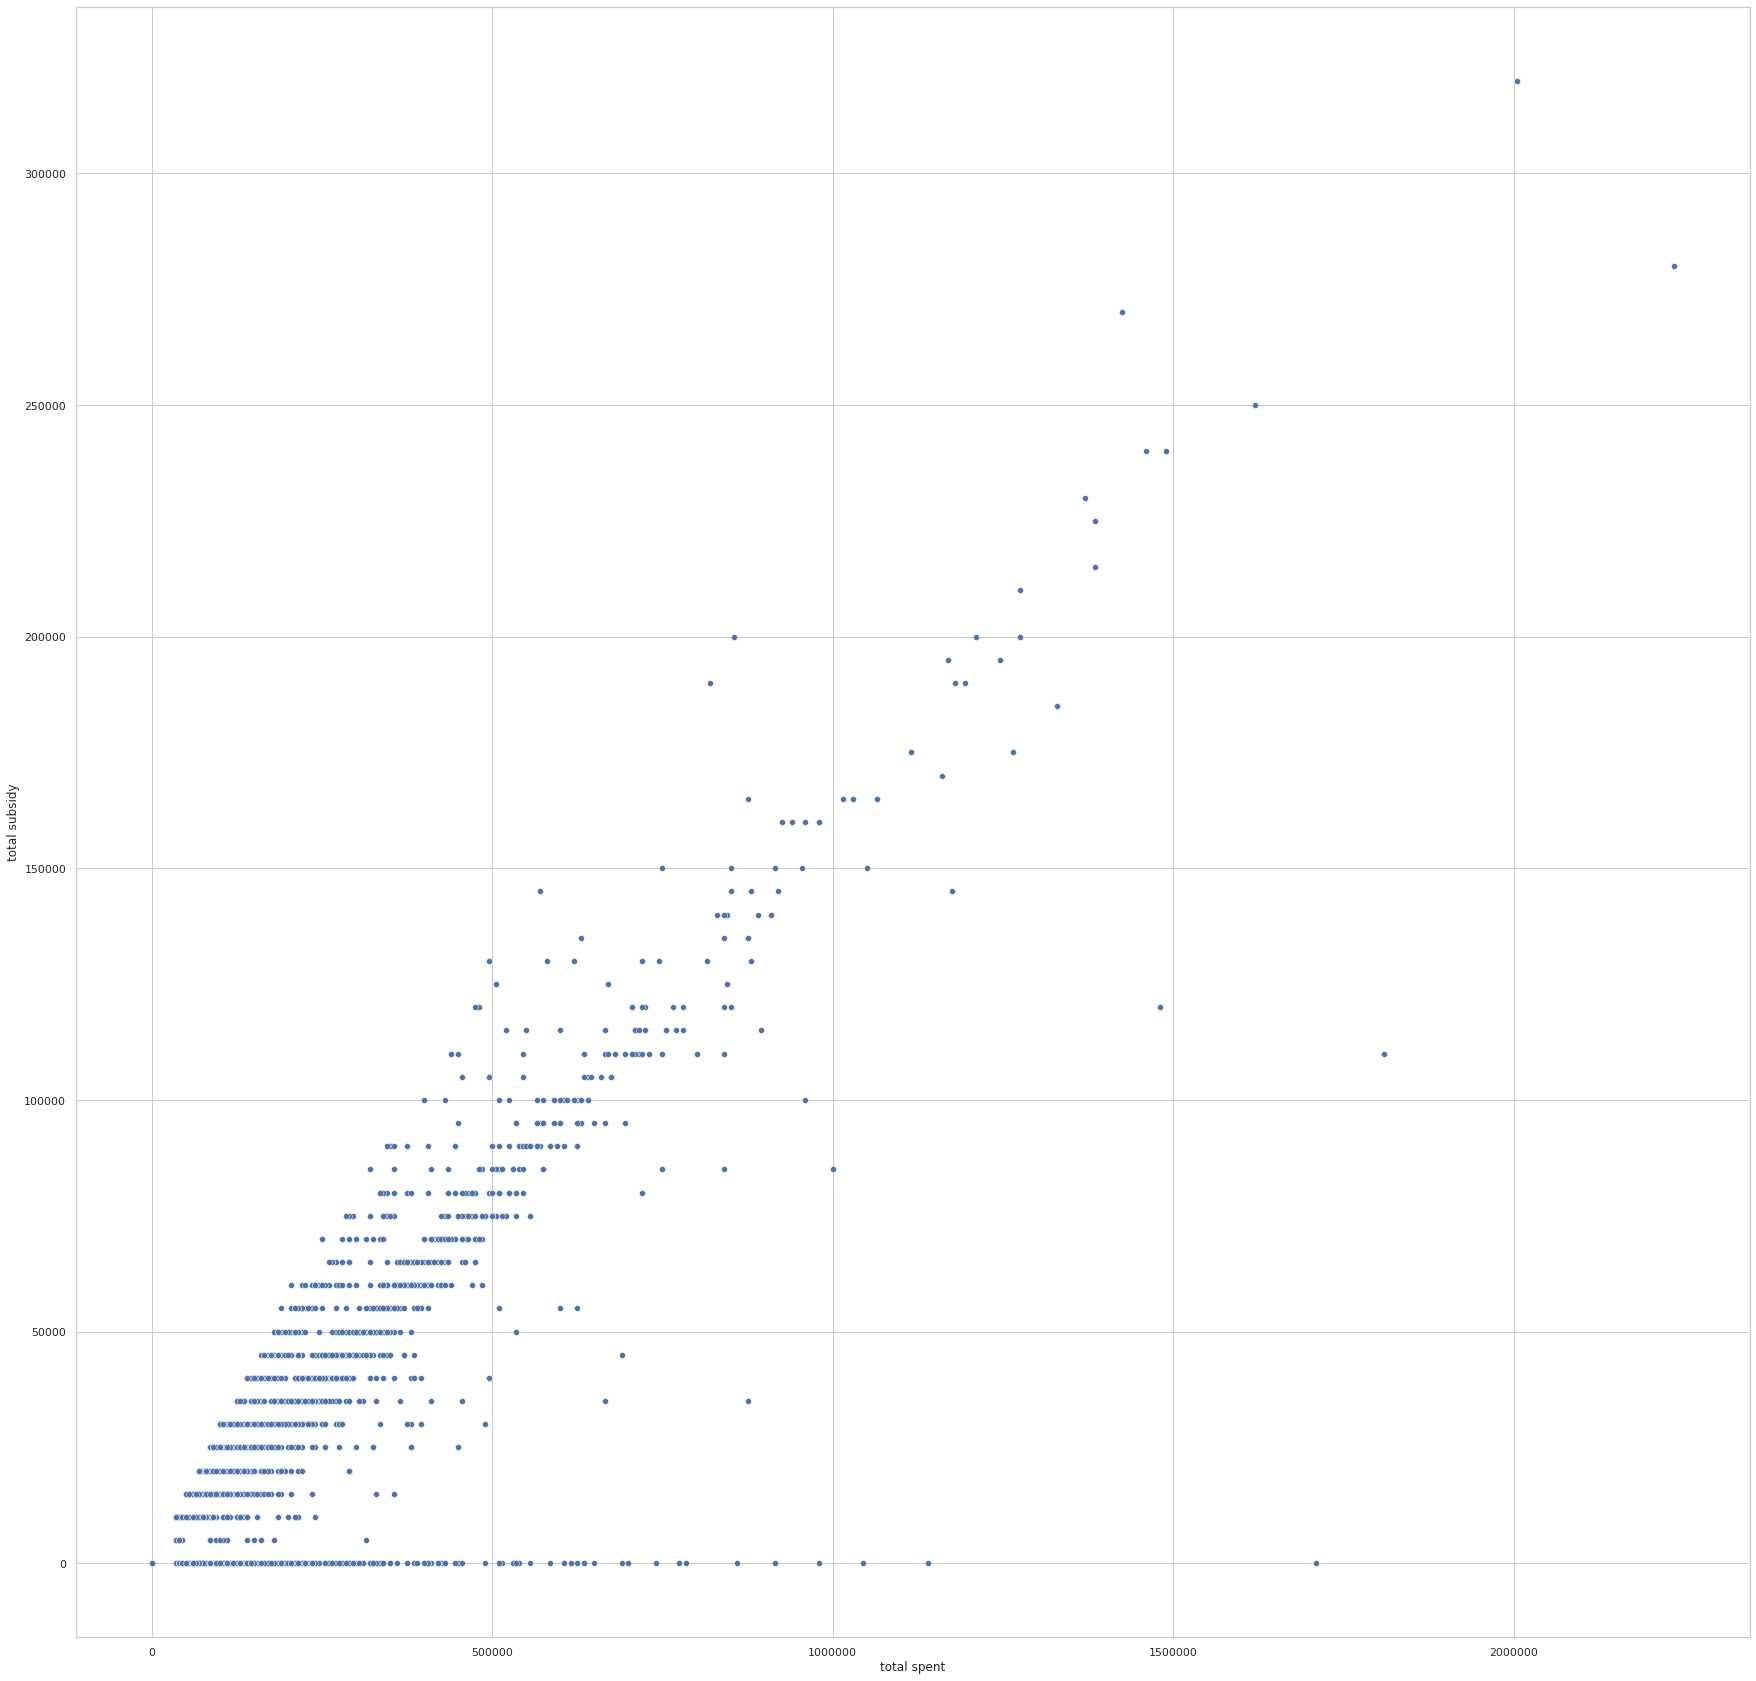

In [259]:
plt.ticklabel_format(style='plain')
g = sns.scatterplot(x="total spent", y="total subsidy", data=Bashgah_Moshtarian)

#First Impression

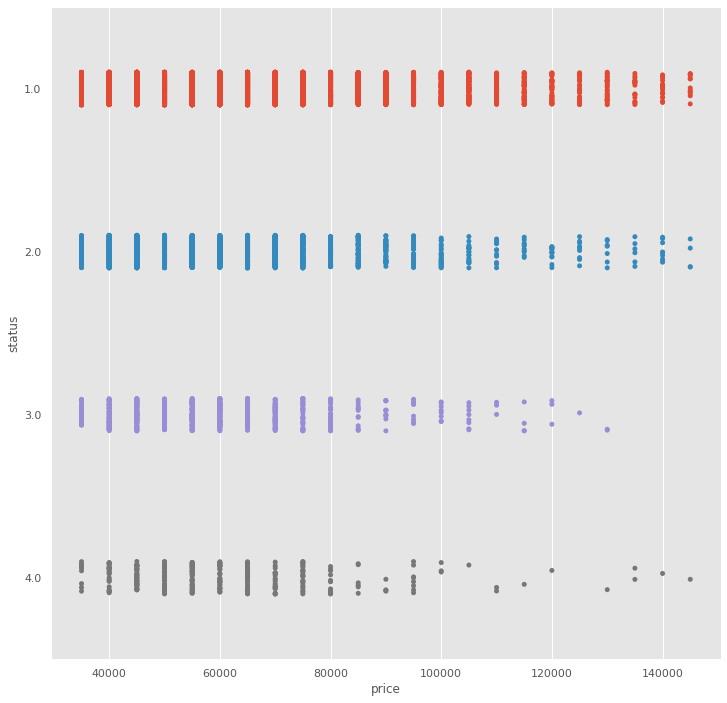

In [ ]:
plt.rcParams['figure.figsize'] = [12,12]
Requested_DF['status'] = Requested_DF['status'].astype(str)
f = Requested_DF.loc[Requested_DF['price'] < 150000]
sns.stripplot(data=f, x='price', y='status')

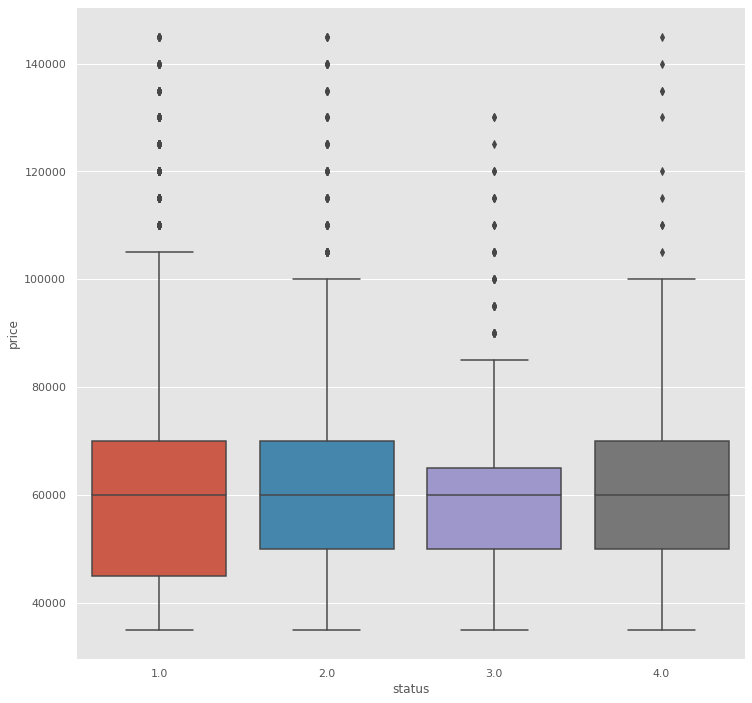

In [ ]:
sns.boxplot(data = f , x = "status" , y = "price")

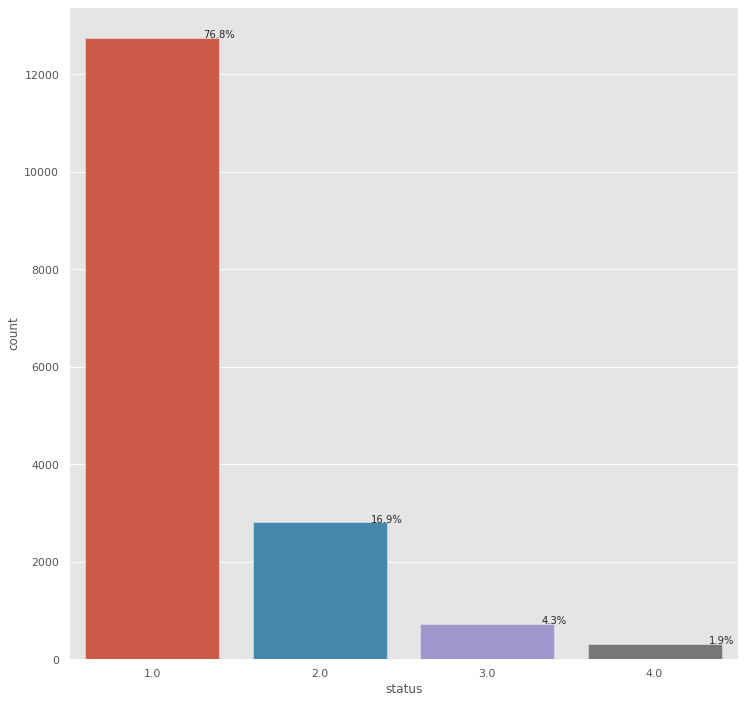

In [ ]:
ax = sns.countplot(data = f , x = "status")
total = float(len(f))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

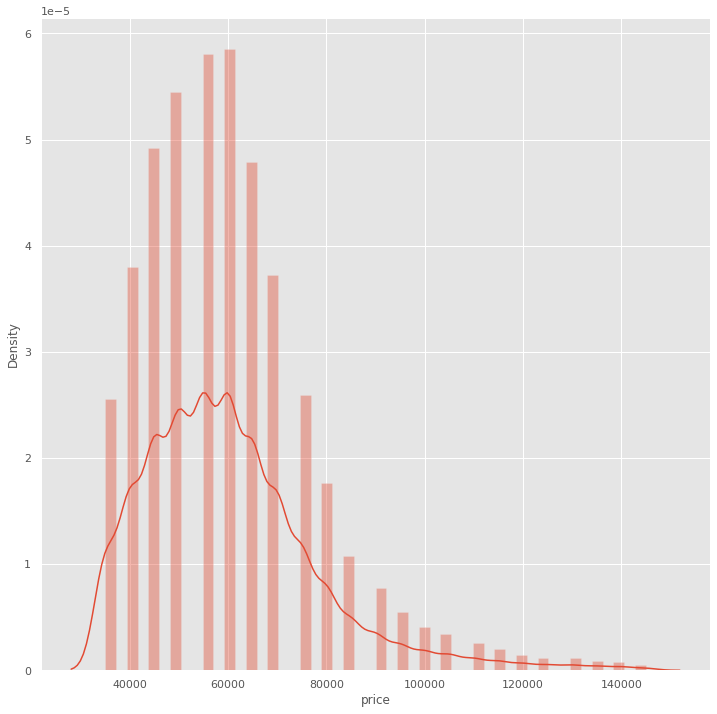

In [ ]:
f = df.loc[df["price"]<150000]
sns.distplot(f["price"])

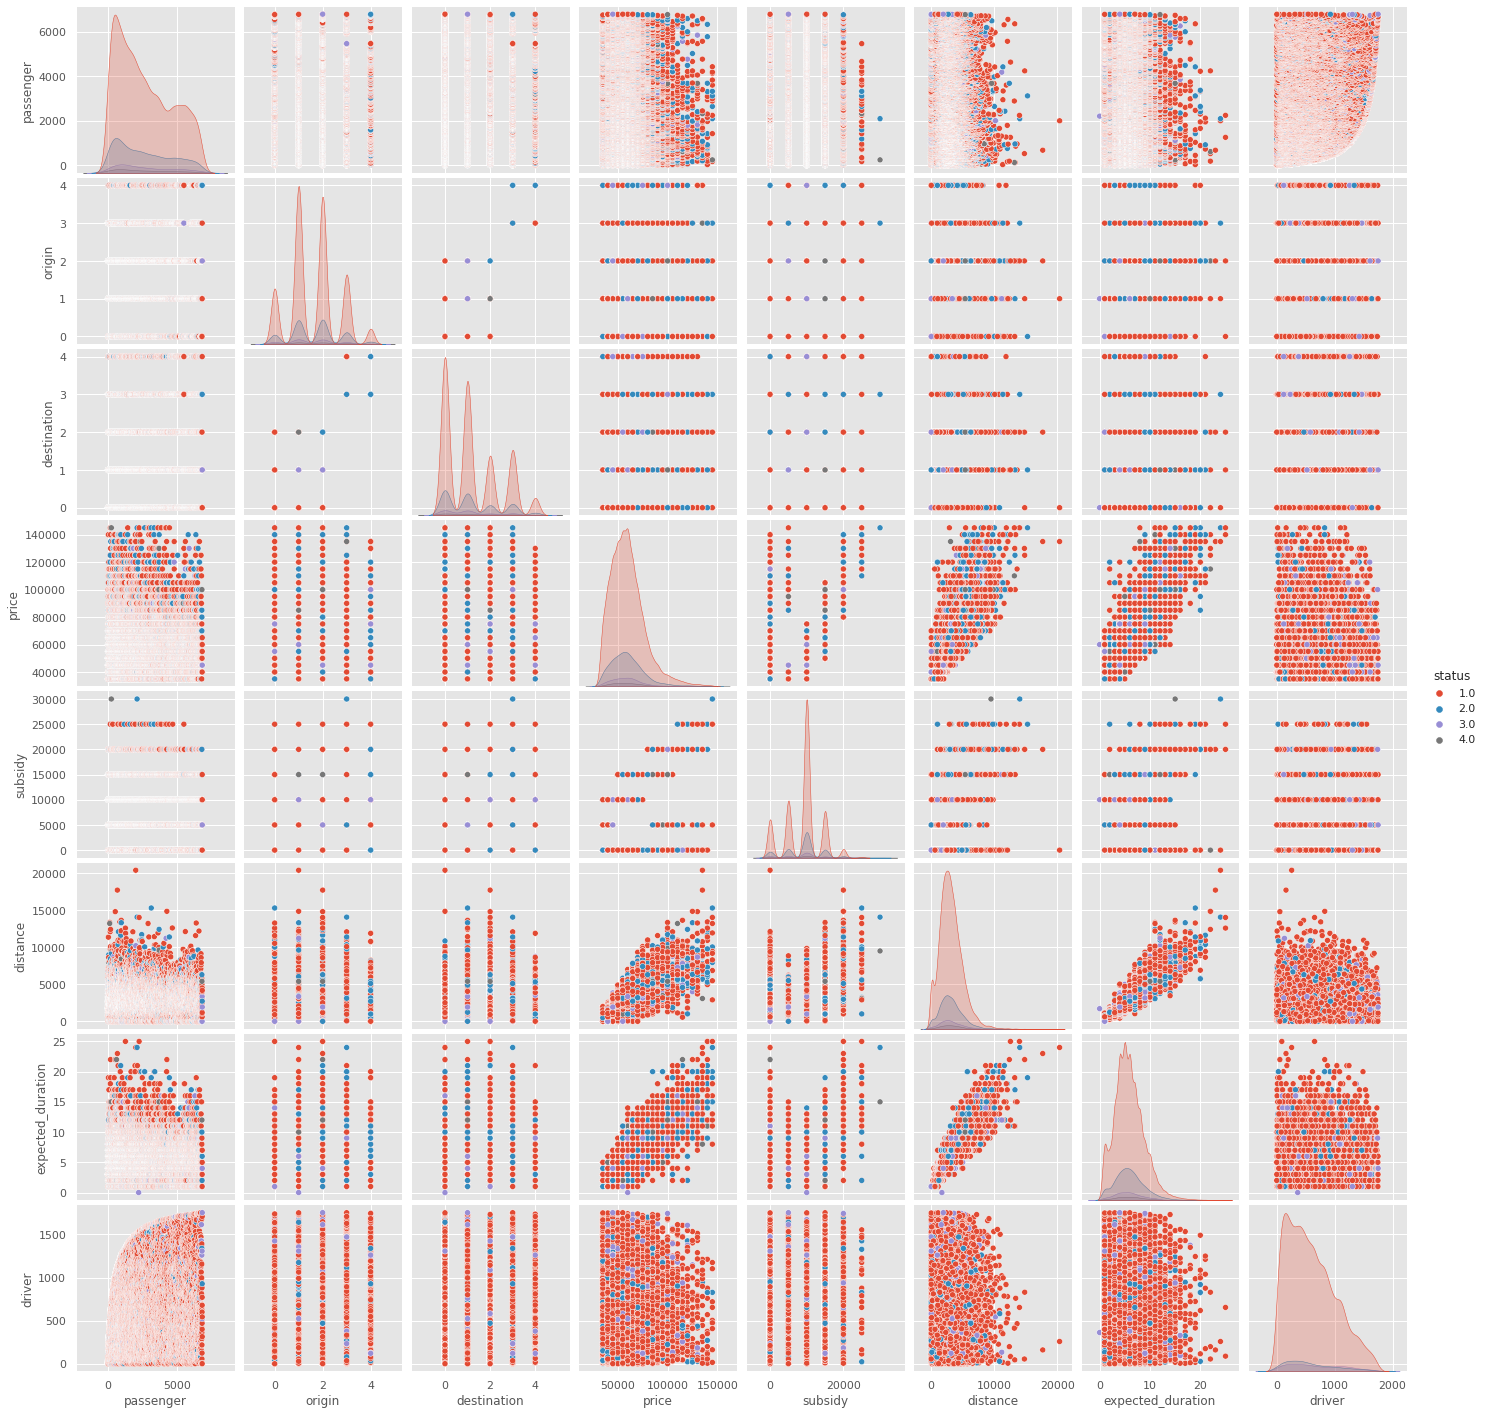

In [ ]:
sns.pairplot(f, hue="status")

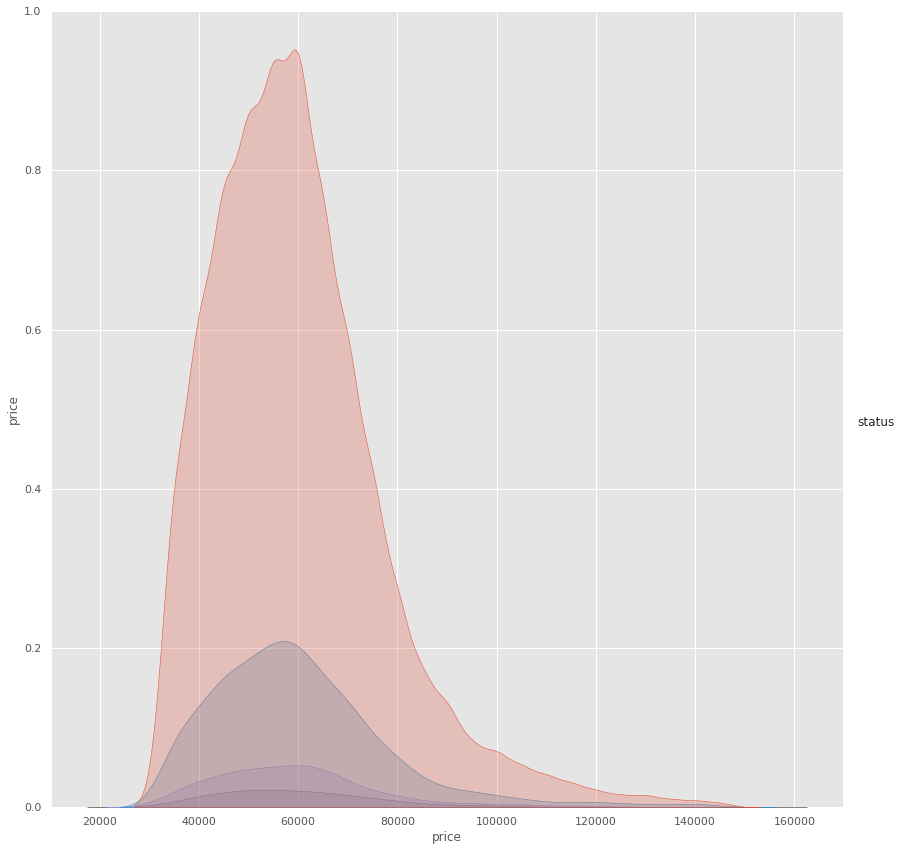

In [ ]:
plt.rcParams['figure.figsize'] = [12,12]
sns.pairplot(f, hue="status" , x_vars = "price" , y_vars = "price" , height = 12)

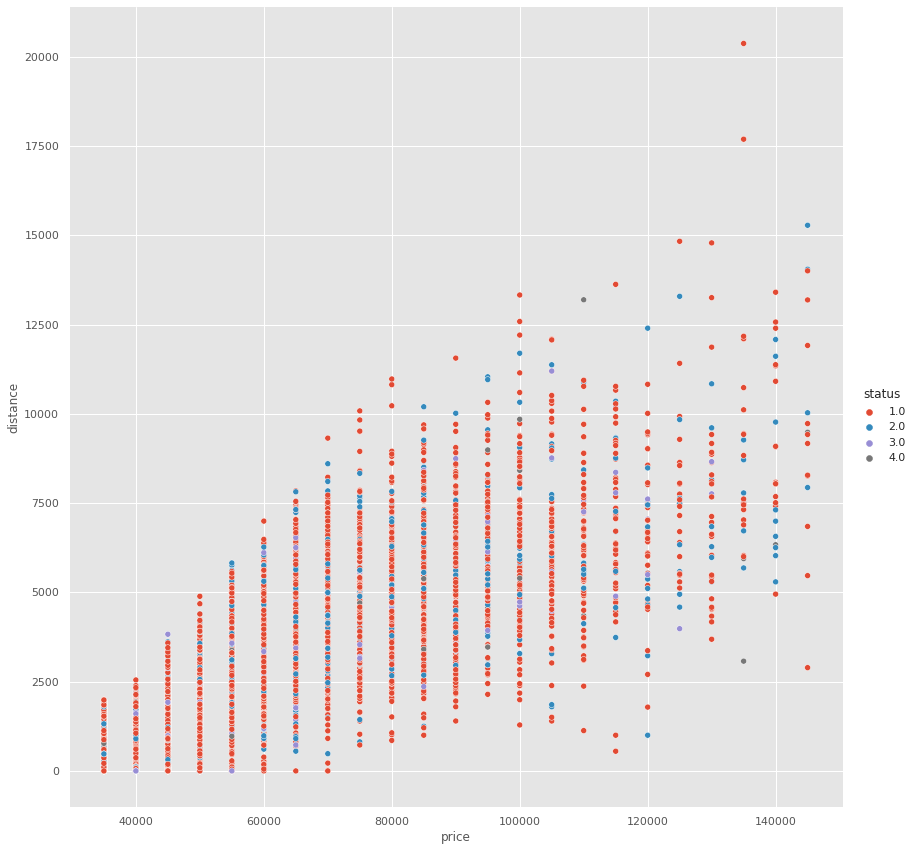

In [ ]:
sns.pairplot(f, hue="status" , x_vars = "price" , y_vars = "distance" , height = 12)

In [ ]:
New_DF

,price_check_time,passenger,origin,destination,price,subsidy,distance,expected_duration,req_time,driver,status,FinalPrice,req_hour,DOW_PRICE_CHECK,Request_BINS
656,2021-01-03 23:53:40,0,0,0,55000,10000,4155.00,8.00,2021-01-06 16:09:01,2.0,1.0,45000,NaN,16,NaN
0,2021-01-04 00:00:22,0,0,0,70000,0,4174.00,8.00,NaT,nan,nan,70000,NaN,NaN,NaN
1422,2021-01-05 01:44:42,0,1,0,50000,0,1857.00,3.00,NaT,nan,nan,50000,NaN,NaN,NaN
3241,2021-01-06 02:02:48,0,1,0,50000,0,713.00,2.00,2021-01-04 21:29:44,1.0,1.0,50000,NaN,21,NaN
1423,2021-01-06 02:12:30,0,1,0,50000,0,713.00,2.00,NaT,nan,nan,50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17835,2021-01-07 06:54:43,999,0,2,85000,0,8088.00,9.00,NaT,nan,nan,85000,NaN,NaN,NaN
20368,2021-01-07 23:02:53,999,2,2,115000,0,9333.00,12.00,2021-01-02 19:51:54,nan,2.0,115000,NaN,19,NaN
20366,2021-01-07 23:03:59,999,2,2,115000,0,9304.00,12.00,NaT,nan,nan,115000,NaN,NaN,NaN
20907,2021-01-07 23:05:47,999,2,2,120000,0,9451.00,12.00,2021-01-02 20:08:18,297.0,1.0,120000,NaN,20,NaN


In [ ]:
f = Requested_DF.loc[(Requested_DF['price']<130000) & ((Requested_DF['status'] == "2.0") | (Requested_DF['status'] == "1.0"))]

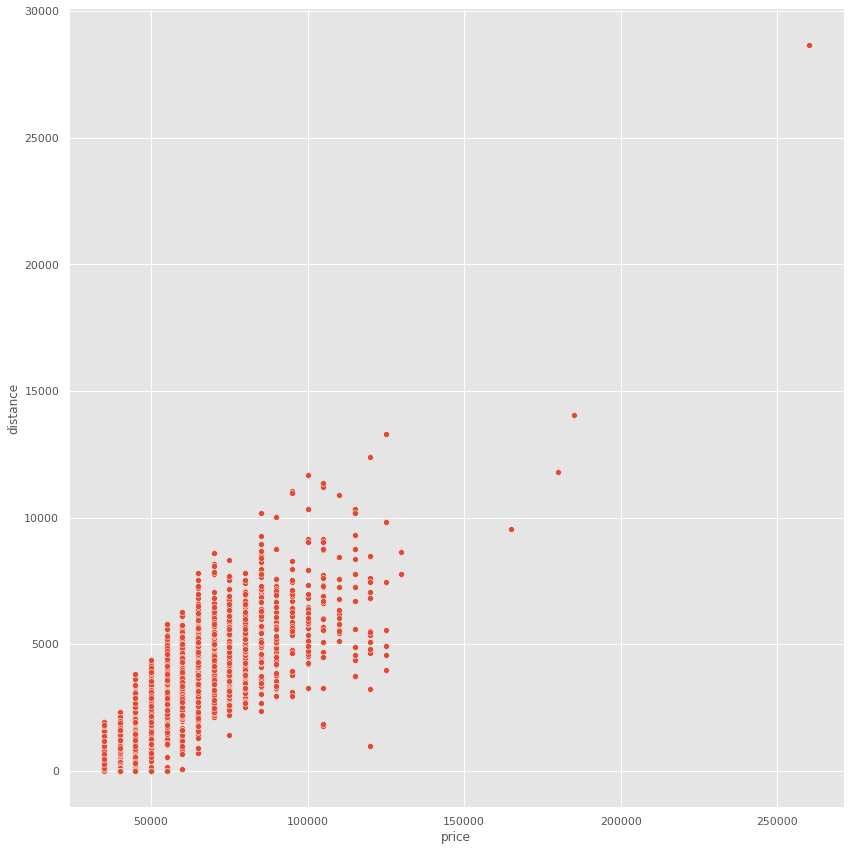

In [ ]:
sns.pairplot(f, x_vars = "price" , y_vars = "distance" , height = 12)

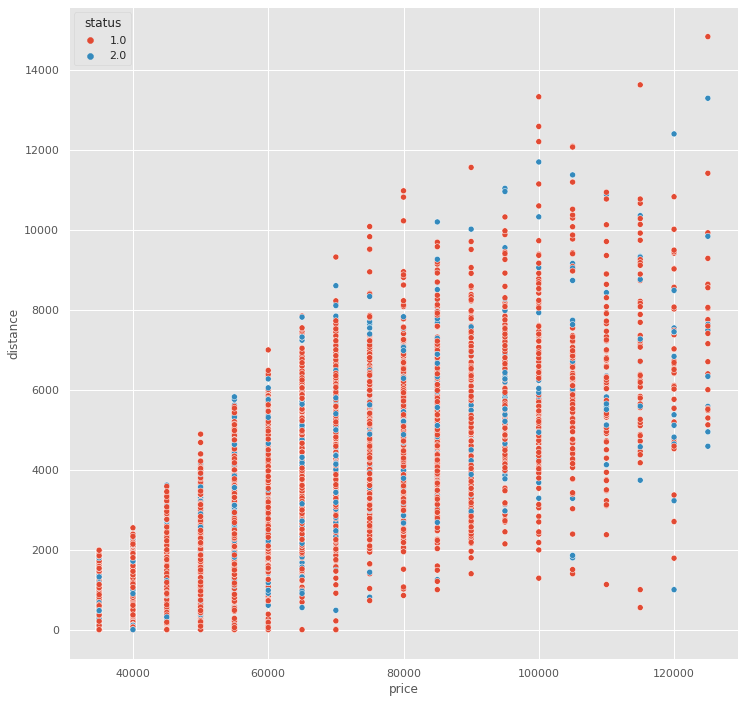

In [ ]:
sns.scatterplot(data = f,x = "price",y = "distance",hue = "status")

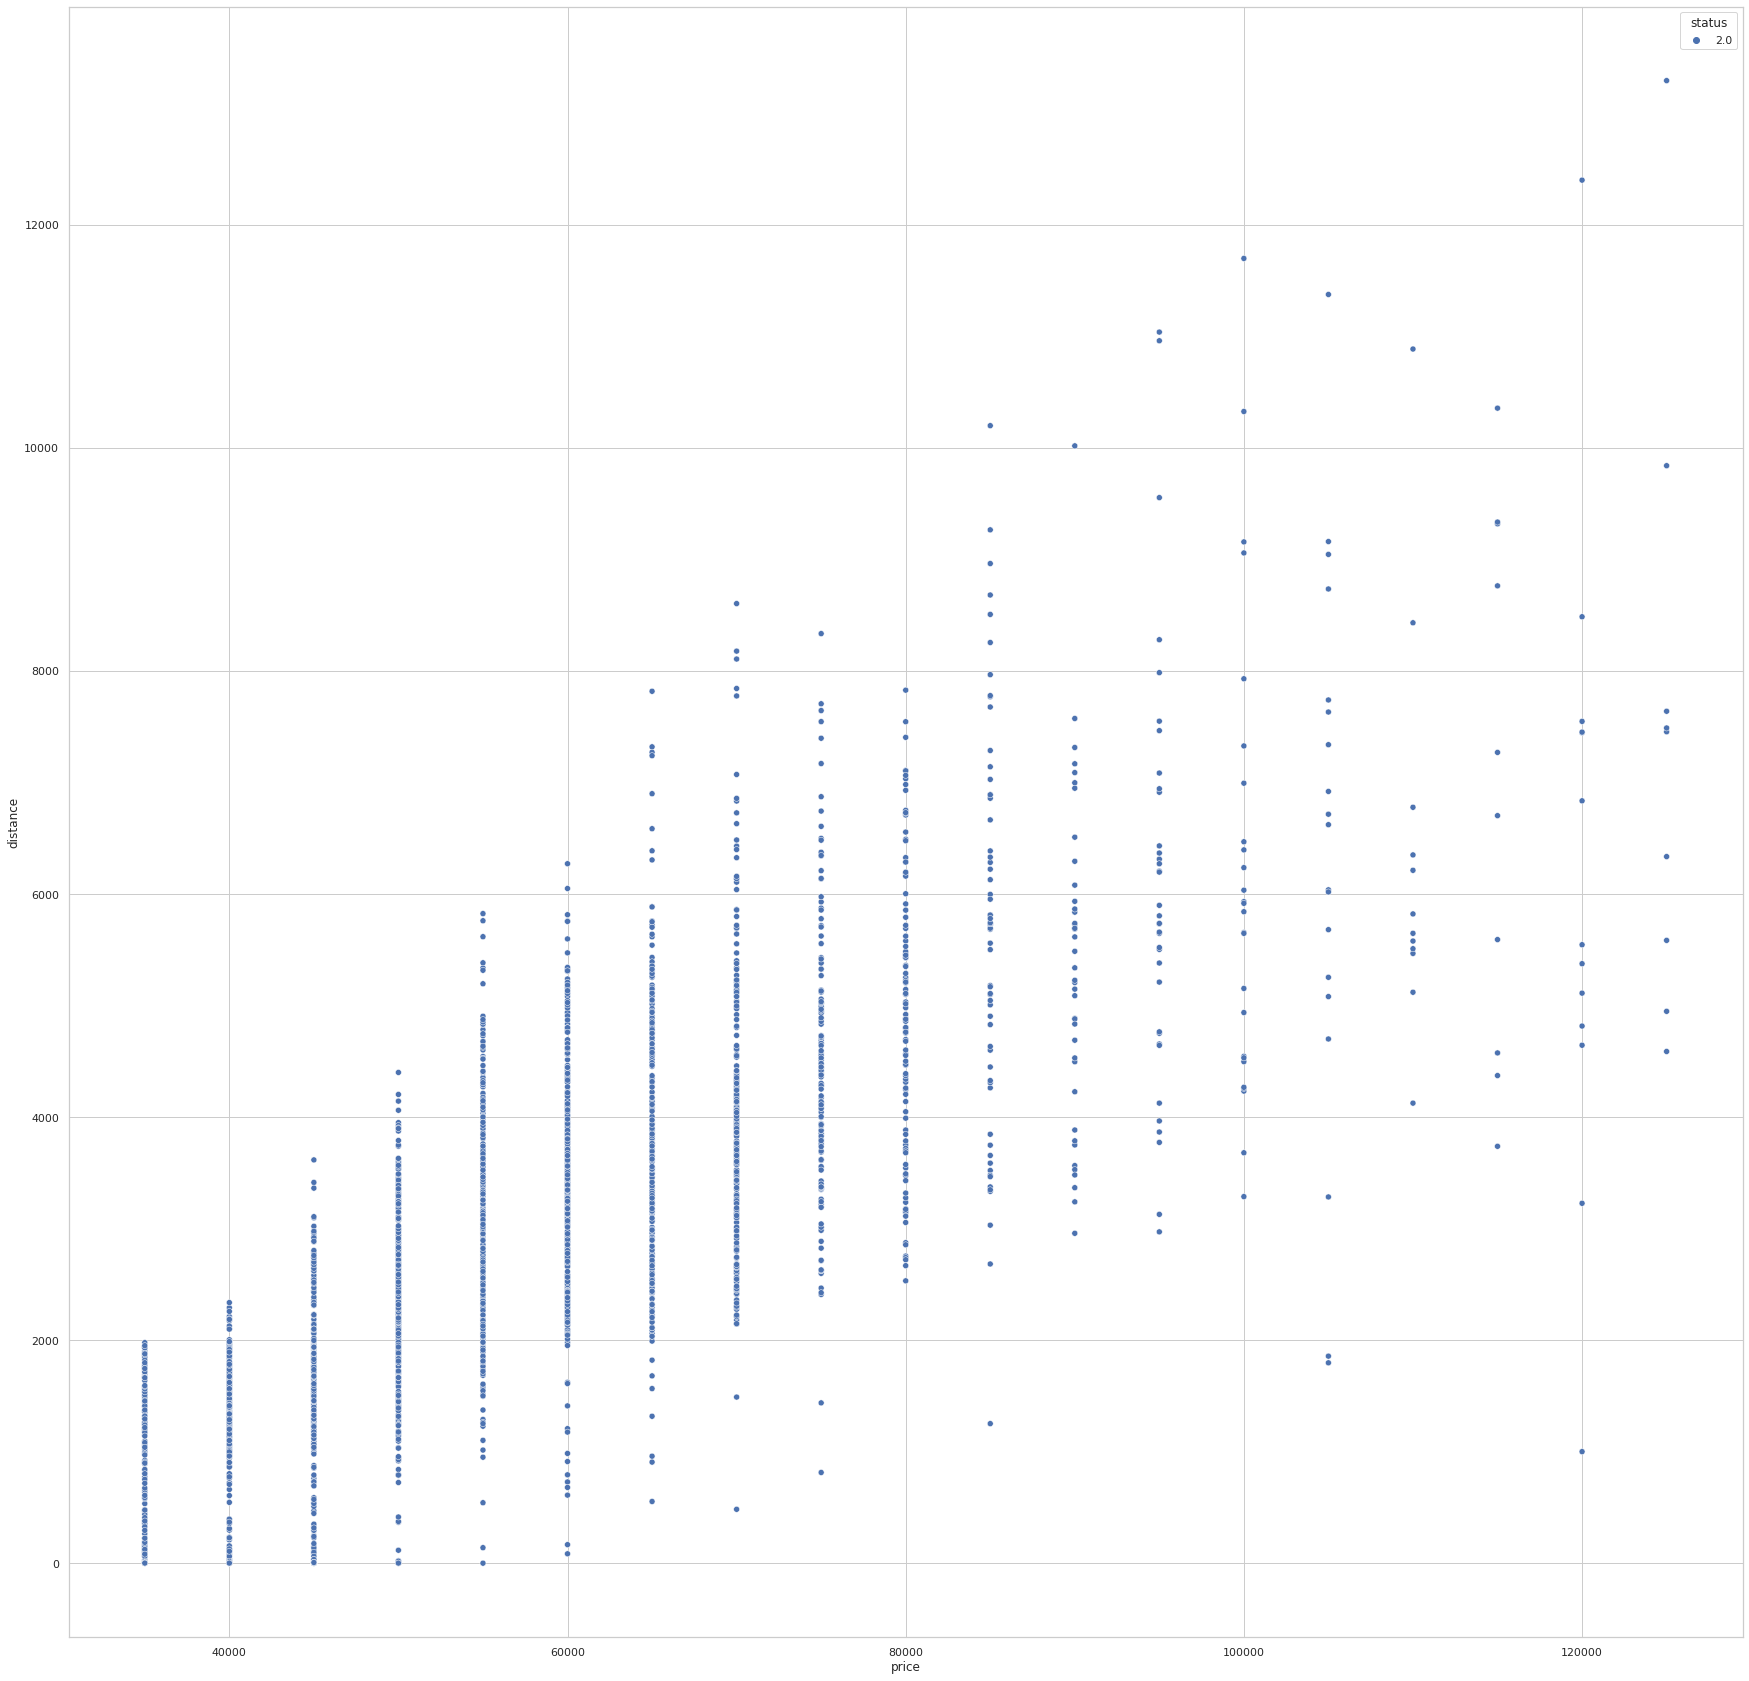

In [261]:
f = Requested_DF.loc[(Requested_DF['price']<130000) & (Requested_DF['status'] == "2.0")]
sns.scatterplot(data = f,x = "price",y = "distance",hue = "status")

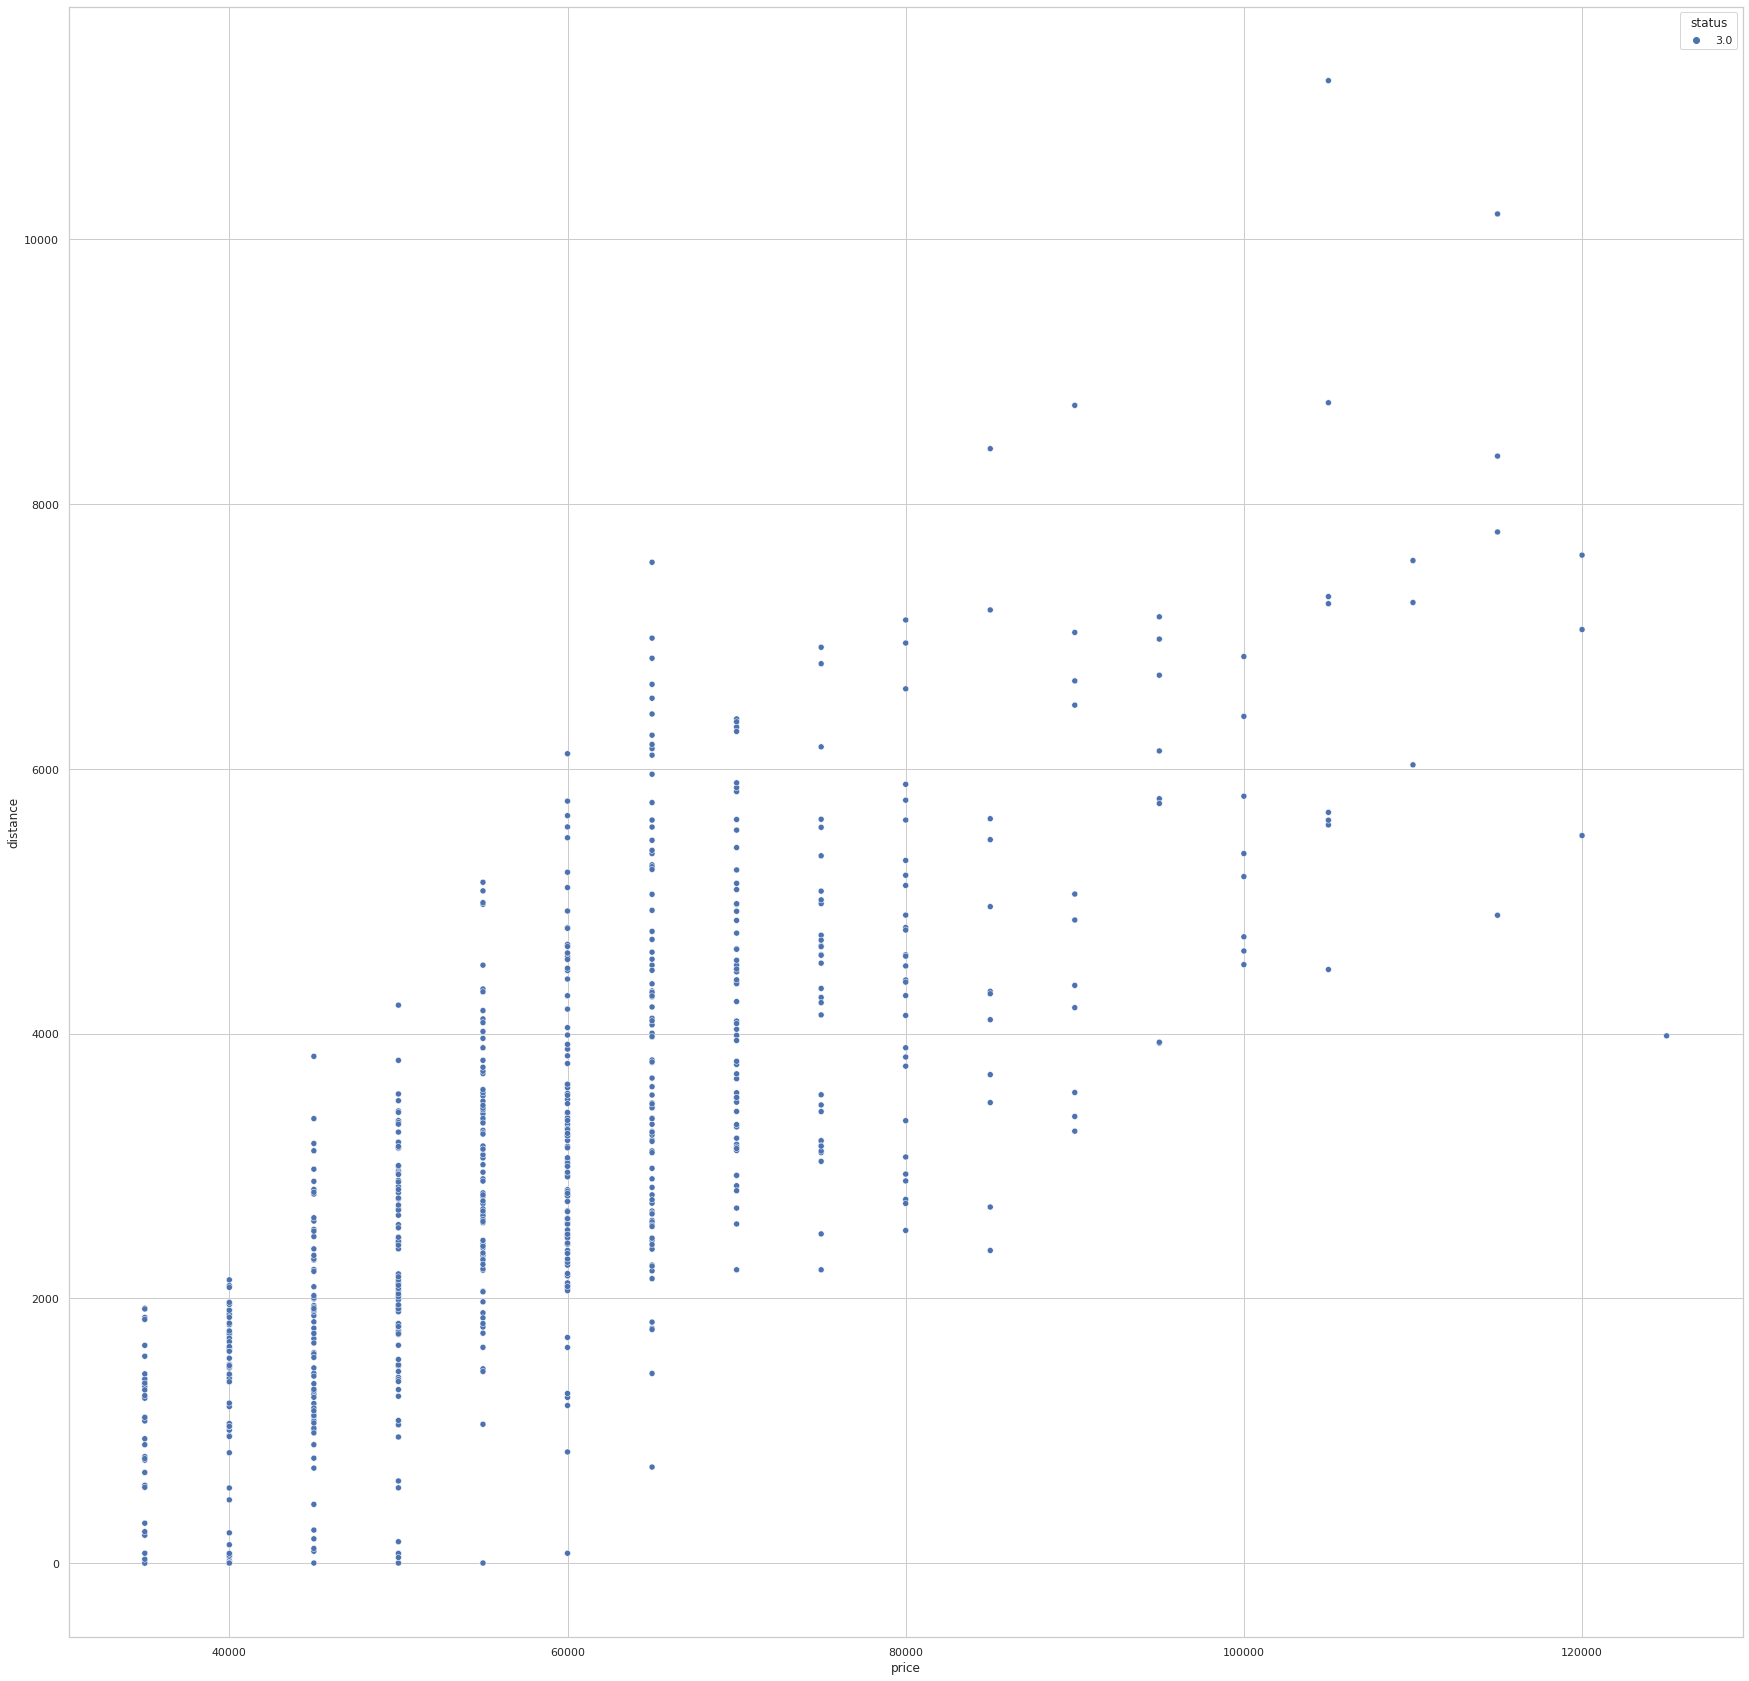

In [262]:
f = Requested_DF.loc[(Requested_DF['price']<130000) & (Requested_DF['status'] == "3.0")]
sns.scatterplot(data = f,x = "price",y = "distance",hue = "status")

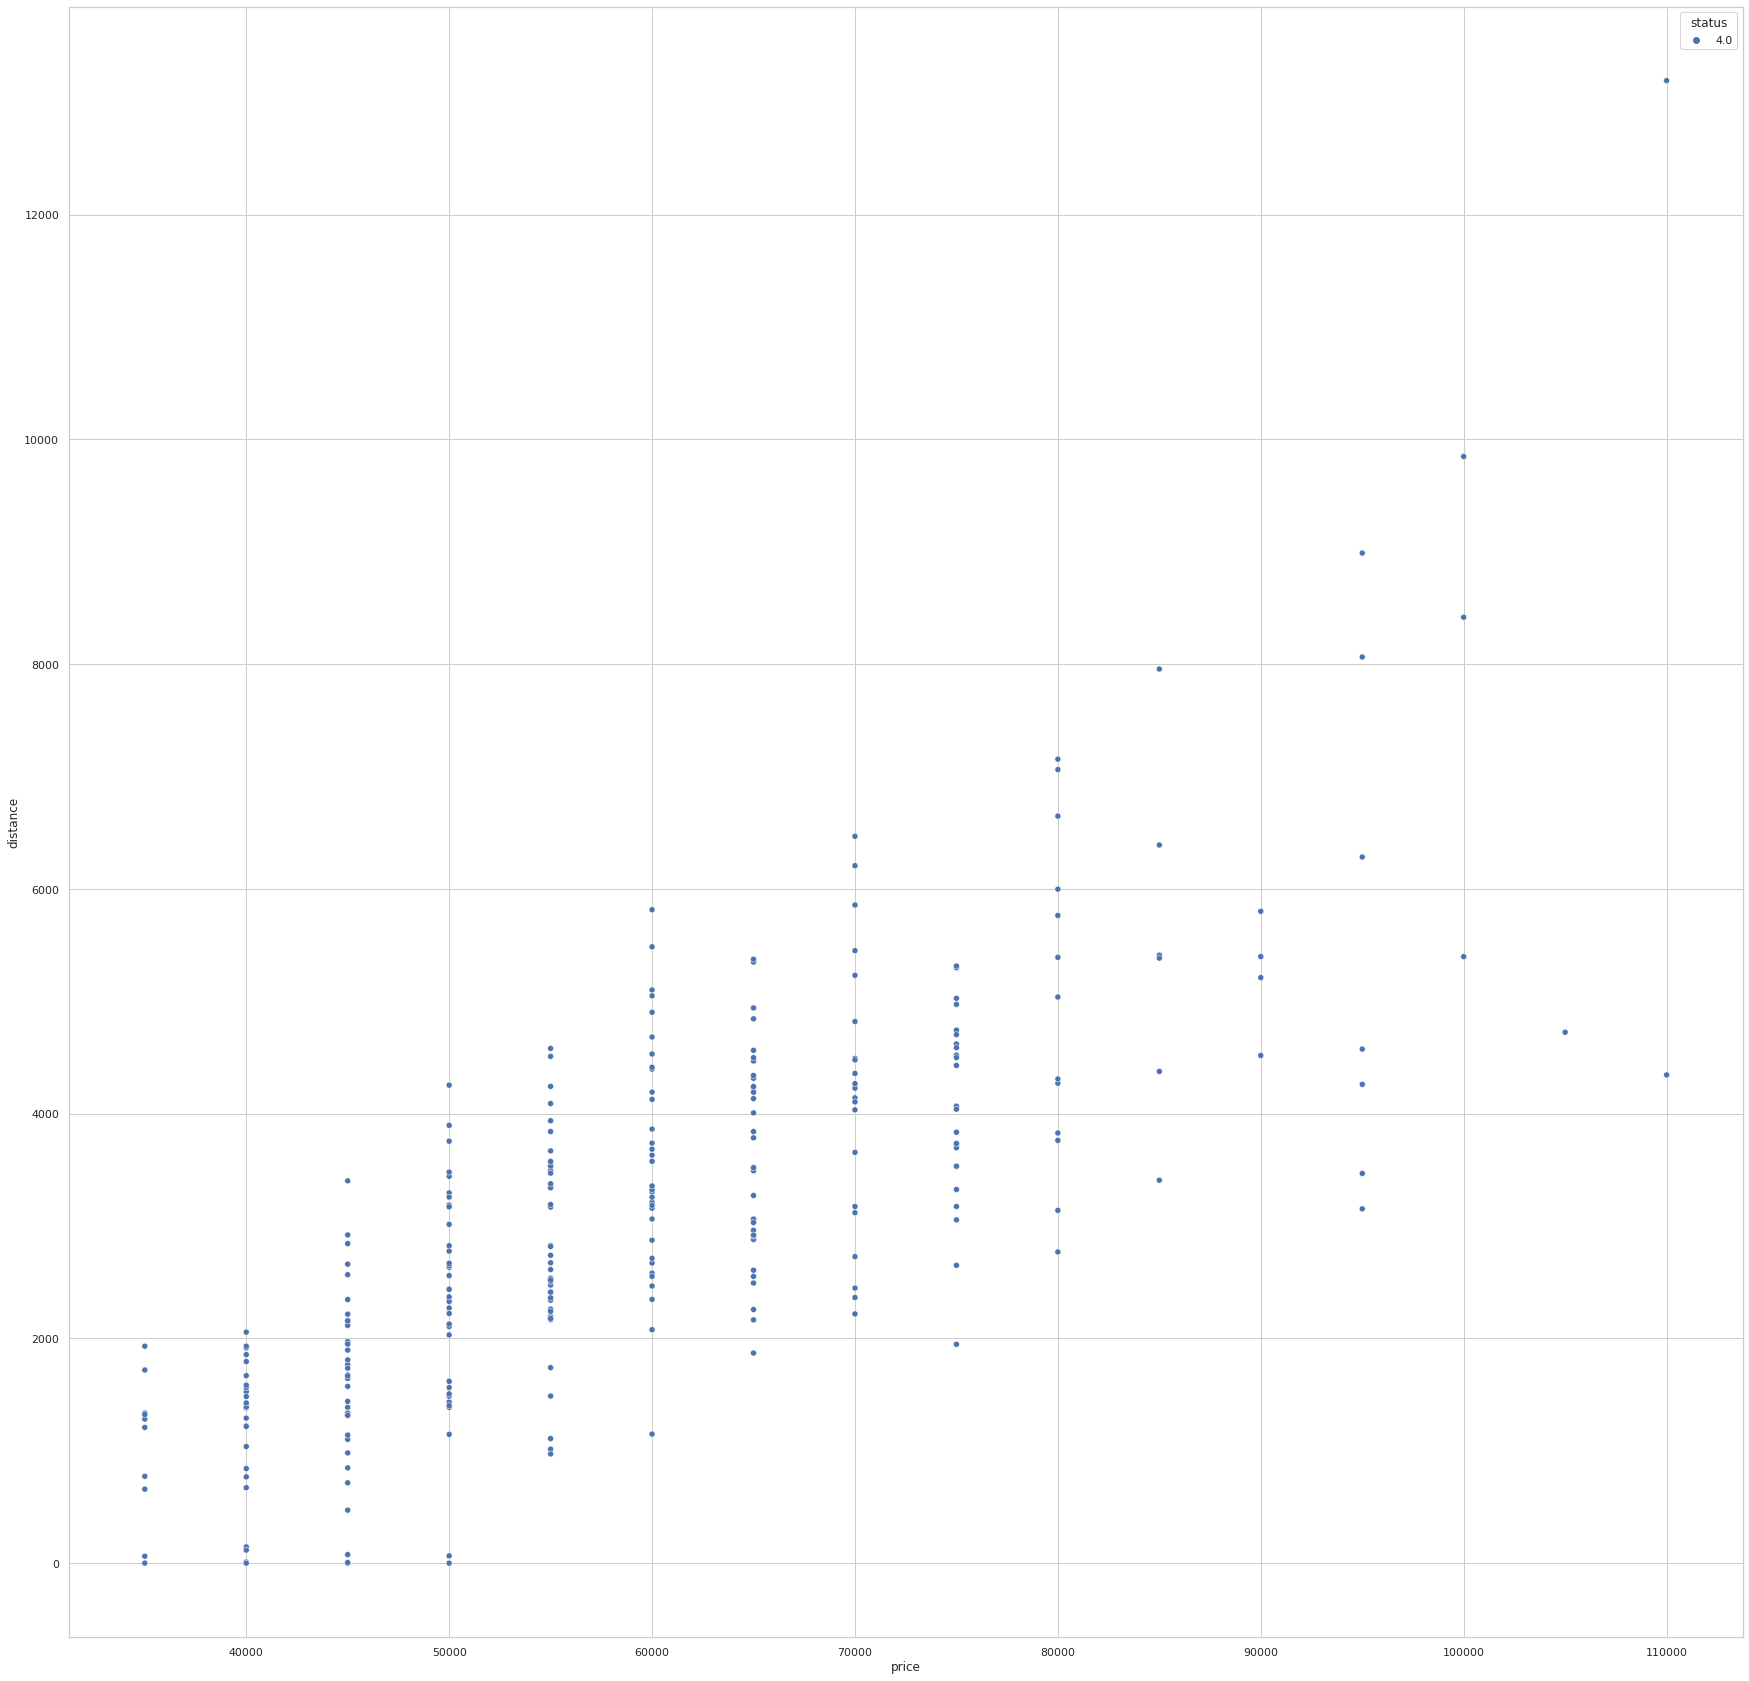

In [263]:
f = Requested_DF.loc[(Requested_DF['price']<130000) & (Requested_DF['status'] == "4.0")]
sns.scatterplot(data = f,x = "price",y = "distance",hue = "status")

#Statistical Tests

In [ ]:
df.corr()

,price,subsidy,distance,expected_duration
price,1.00,0.75,0.81,0.80
subsidy,0.75,1.00,0.66,0.64
distance,0.81,0.66,1.00,0.88
expected_duration,0.80,0.64,0.88,1.00


In [160]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [161]:
import researchpy as rp
import scipy.stats as stats

In [ ]:
summary, results = rp.ttest(group1= df['price'][df['status'] == '2.0'], group1_name= "Canceled By Customer",
         group2= df['price'][df['status'] == '1.0'], group2_name= "Done")
print(summary)

               Variable        N     Mean       SD     SE  95% Conf.  Interval
0  Canceled By Customer  2836.00 61974.61 31902.86 599.07   60799.96  63149.27
1                  Done 12838.00 61099.08 30580.12 269.89   60570.05  61628.11
2              combined 15674.00 61257.50 30824.47 246.21   60774.90  61740.10


In [ ]:
print(results)

                            Independent t-test  results
0  Difference (Canceled By Customer - Done) =    875.53
1                        Degrees of freedom =  15672.00
2                                         t =      1.37
3                     Two side test p value =      0.17
4                    Difference < 0 p value =      0.91
5                    Difference > 0 p value =      0.09
6                                 Cohen's d =      0.03
7                                 Hedge's g =      0.03
8                             Glass's delta =      0.03
9                               Pearson's r =      0.01


In [ ]:
stats.ttest_ind(df['price'][df['status'] == '2.0'],
         df['price'][df['status'] == '1.0'])

Ttest_indResult(statistic=1.3689894291416451, pvalue=0.17102219897477317)

now drivers

In [162]:
summary, results = rp.ttest(group1= df['price'][df['status'] == '3.0'], group1_name= "Canceled By Driver",
         group2= df['price'][df['status'] == '1.0'], group2_name= "Done")
print(summary)

             Variable        N     Mean       SD     SE  95% Conf.  Interval
0  Canceled By Driver   723.00 60504.84 19857.20 738.50   59054.98  61954.70
1                Done 12838.00 61099.08 30580.12 269.89   60570.05  61628.11
2            combined 13561.00 61067.40 30104.75 258.52   60560.67  61574.13


In [163]:
print(results)

                          Independent t-test  results
0  Difference (Canceled By Driver - Done) =   -594.24
1                      Degrees of freedom =  13559.00
2                                       t =     -0.52
3                   Two side test p value =      0.61
4                  Difference < 0 p value =      0.30
5                  Difference > 0 p value =      0.70
6                               Cohen's d =     -0.02
7                               Hedge's g =     -0.02
8                           Glass's delta =     -0.03
9                             Pearson's r =      0.00


now drivers and customers

In [164]:
summary, results = rp.ttest(group1= df['price'][df['status'] == '2.0'], group1_name= "Canceled By Customer",
         group2= df['price'][df['status'] == '3.0'], group2_name= "Canceled By Driver")
print(summary)

               Variable       N     Mean       SD     SE  95% Conf.  Interval
0  Canceled By Customer 2836.00 61974.61 31902.86 599.07   60799.96  63149.27
1    Canceled By Driver  723.00 60504.84 19857.20 738.50   59054.98  61954.70
2              combined 3559.00 61676.03 29855.27 500.45   60694.84  62657.22


In [165]:
print(results)

                                  Independent t-test  results
0  Difference (Canceled By Customer - Canceled By...  1469.77
1                              Degrees of freedom =   3557.00
2                                               t =      1.18
3                           Two side test p value =      0.24
4                          Difference < 0 p value =      0.88
5                          Difference > 0 p value =      0.12
6                                       Cohen's d =      0.05
7                                       Hedge's g =      0.05
8                                   Glass's delta =      0.05
9                                     Pearson's r =      0.02


#Saves and inputs

Bashgah_Moshtarian
Club_Ranandegan
New_DF
Not_requested_DF
Requested_DF

In [172]:
Bashgah_Moshtarian.dtypes

id    object
dtype: object

In [173]:
Club_Ranandegan.dtypes

id    object
dtype: object

In [174]:
New_DF.dtypes

price_check_time               datetime64[ns]
passenger                              object
origin                                 object
destination                            object
price                                   int64
subsidy                                 int64
distance                              float64
expected_duration                     float64
req_time                       datetime64[ns]
driver                                 object
status                                 object
FinalPrice                              int64
DOW_PRICE_CHECK                        object
req_hour                              float64
Request_BINS                         category
Hour of price check                     int64
status of request from user            object
status of drive from driver            object
Dayname of Request                     object
Dayname of pricecheck                  object
Monthname of Request                   object
Monthname of pricecheck           

In [260]:
Bashgah_Moshtarian.to_csv("/content/drive/MyDrive/Save Variables/Bashgah_Moshtarian.csv")
Club_Ranandegan.to_csv("/content/drive/MyDrive/Save Variables/Club_Ranandegan.csv")
New_DF.to_csv("/content/drive/MyDrive/Save Variables/New_DF.csv")
Not_requested_DF.to_csv("/content/drive/MyDrive/Save Variables/Not_requested_DF.csv")
Requested_DF.to_csv("/content/drive/MyDrive/Save Variables/Requested_DF.csv")